<a href="https://colab.research.google.com/github/lcfdiniz/puc-rio/blob/main/real-estate-market/real_estate_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [408]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

# Análise de dados do mercado imobiliário

por [Lucas Fiorani Diniz](https://www.linkedin.com/in/lcfdiniz/)

## Definição do problema

Em 1948, a Declaração Universal dos Direitos Humanos reconheceu o **direito à moradia** como fundamental para a vida das pessoas. O acesso a uma habitação digna garante abrigo e segurança, além de contribuir para o bem-estar social, familiar, social e profissional.

O mercado imobiliário fornece os meios para que as pessoas possam adquirir suas moradias. Este envolve a compra e venda de casas, escritórios, lojas, terrenos e outras propriedades, sendo dividido em diferentes segmentos, como o residencial, o comercial e o industrial. O investimento em imóveis, por sua vez, é uma das estratégias mais populares e historicamente comprovadas para geração de renda passiva.

Nesse contexto, é fácil perceber o papel fundamental desempenhado pelo mercado imobiliário na economia e na vida das pessoas. A bolha imobiliária que resultou na crise financeira de 2008 [[1]](https://www.politize.com.br/crise-financeira-de-2008/) talvez seja o exemplo mais claro de como esse mercado impacta nossas vidas e a sociedade de modo geral.

Um dos principais desafios ligados ao mercado imobiliário é a correta avaliação do preço de um imóvel. A habilidade de reconhecer as melhores oportunidades é um fator chave de sucesso tanto para investidores quanto para aqueles que vislumbram o sonho da casa própria. Nesse sentido, é fundamental identificar quais fatores contribuem para o preço de um imóvel e, mais do que isso, como esses fatores compõe seu preço final.

Nesse trabalho, será realizada a análise e pré-processamento de dados reais do mercado imobiliário. Por meio da análise exploratória de dados, é esperado encontrar padrões e identificar quais variáveis mais impactam no preço de uma moradia.

Os dados processados poderiam ser utilizados para uma etapa posterior de construção de um modelo de **aprendizado supervisionado** para previsão do preço de um imóvel dadas as suas características, sendo esse um problema de regressão. Essa parte, no entanto, está além do escopo do presente trabalho.

### Levantamento de hipóteses

Considerando as informações apresentadas acima, é possível levantar as seguintes hipóteses a respeito da relação entre as características de um imóvel e o preço final do mesmo:

- Os imóveis com maior área também são os mais caros;

- Os imóveis com mais cômodos (quartos e banheiros) são mais caros que os demais;

- Os imóveis sem vagas de garagem são mais baratos que os demais;

- Os imóveis com mais opções de lazer também são os mais caros;

- As casas são, de modo geral, mais caras que os apartamentos.

### Restrições e condições respeitadas

Para se obter os dados do problema, foi utilizada uma técnica de web scraping em um portal de compra e venda de imóveis. Web scraping é uma técnica de extração de dados da web, na qual um programa de computador automatizado acessa sites da internet e coleta informações de forma sistemática e estruturada. O script utilizado é de autoria própria e seguiu as recomendações para tal prática (`robots.txt`) do portal acessado.

O conjunto final de dados coletados possui 1567 registros, um para cada imóvel, com 18 diferentes features. A aquisição de dados foi realizada no dia 01/11/2023 e considerou apenas os imóveis de minha cidade natal, Juiz de Fora - MG. É importante destacar que algumas operações de pré-processamento foram realizadas a priori, de forma a anonimizar os dados e garantir uma estrutura mínima.

Sendo assim, algumas considerações devem ser feitas:

- Devido à alta volatilidade de preços do mercado imobiliário, dada por fatores como a oferta e demanda, cenário econômico e políticas locais, é possível que os valores aqui registrados logo se tornem desatualizados. Os padrões encontrados, no entanto, devem persistir;

- As análises realizadas são válidas para a cidade de Juiz de Fora - MG, mas podem não representar a realidade de outras localizações. Aspectos culturais e/ou geográficos podem influenciar as características valorizadas em um imóvel por compradores/vendedores dessa região;

- Nesse dataset foram consideradas apenas casas e apartamentos, para reduzir a variabilidade dos dados e aumentar sua coesão. Algumas características desse conjunto de dados não fariam sentido caso o imóvel fosse um escritório ou terreno, por exemplo;

- Existem outros fatores não capturados pelos dados que podem influenciar consideravelmente no preço de venda de um imóvel, como seu estado de conservação, idade do imóvel, tempo de exposição ao sol, dentre outras avaliações subjetivas.


### Dataset utilizado

  Mais detalhes sobre esse conjunto serão fornecidos na seção de "Análise de dados". A seguir, cada atributo do dataset será melhor descrito:

  - `Tipo_de_Moradia`: indica se a moradia é uma casa ou apartamento;

  - `Bairro`: nome do bairro do imóvel;

  - `Area`:  área total do imóvel;

  - `Quartos`: número de quartos do imóvel;

  - `Banheiros`: número de banheiros do imóvel;

  - `Vagas`: número de vagas na garagem do imóvel;

  - `Preco`: valor de venda do imóvel, conforme anunciado no portal;

  - `Condominio`: valor mensal do condomínio;

  - `Aceita_Animais`: se o condomínio aceita (1) ou não (0) animais;

  - `Area_de_Servico`: se o imóvel possui (1) ou não (0) área de serviço;

  - `Churrasqueira`: se o imóvel possui (1) ou não (0) churrasqueira;

  - `Elevador`: se o imóvel ou condomínio possui (1) ou não (0) elevador;

  - `Varanda`: se o imóvel possui (1) ou não (0) varanda;

  - `Piscina`: se o imóvel ou condomínio possui (1) ou não (0) piscina;

  - `Condominio_Fechado`: se o condomínio é fechado (1) ou não (0);

  - `Espaco_Gourmet`: se o imóvel ou condomínio possui (1) ou não (0) espaço gourmet;

  - `Portao_Eletronico`: se o imóvel ou condomínio possui (1) ou não (0) portão eletrônico;

  - `Quintal_ou_Jardim`: se o imóvel possui (1) ou não (0) quintal ou jardim.

## Análise de dados

In [409]:
# URL para o repositório do GitHub onde os dados foram disponibilizados
url = "https://raw.githubusercontent.com/lcfdiniz/puc-rio/main/real-estate-market/data/real-estate-records.csv"

In [410]:
df = pd.read_csv(url)

df.head()

,Tipo_de_Moradia,Bairro,Area,Quartos,Banheiros,Vagas,Preco,Condominio,Aceita_Animais,Area_de_Servico,Churrasqueira,Elevador,Varanda,Piscina,Condominio_Fechado,Espaco_Gourmet,Portao_Eletronico,Quintal_ou_Jardim
0,Apartamento,Santa Efigênia,150.0,2.0,3.0,1.0,195000,NaN,False,False,False,False,False,False,False,False,False,False
1,Apartamento,Estrela Sul,70.0,2.0,2.0,1.0,250000,270.0,True,False,True,True,False,True,True,False,False,False
2,Casa,Fontesville,217.0,3.0,3.0,1.0,420000,NaN,False,False,False,False,False,False,False,False,False,False
3,Apartamento,Aeroporto,76.0,2.0,2.0,1.0,300000,200.0,True,True,False,True,True,True,False,True,False,False
4,Apartamento,Paineiras,63.0,2.0,1.0,NaN,148000,152.0,False,False,False,False,False,False,False,False,True,False


In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tipo_de_Moradia     1567 non-null   object 
 1   Bairro              1567 non-null   object 
 2   Area                1567 non-null   float64
 3   Quartos             1565 non-null   float64
 4   Banheiros           1567 non-null   float64
 5   Vagas               1359 non-null   float64
 6   Preco               1567 non-null   int64  
 7   Condominio          741 non-null    float64
 8   Aceita_Animais      1567 non-null   bool   
 9   Area_de_Servico     1567 non-null   bool   
 10  Churrasqueira       1567 non-null   bool   
 11  Elevador            1567 non-null   bool   
 12  Varanda             1567 non-null   bool   
 13  Piscina             1567 non-null   bool   
 14  Condominio_Fechado  1567 non-null   bool   
 15  Espaco_Gourmet      1567 non-null   bool   
 16  Portao

  ### Estatísticas descritivas
  
  O dataset é composto por 1.567 entradas de dados e 18 features, sendo 6 representadas por valores numéricos (5 por números de ponto flutuante e 1 por números inteiros), 2 representadas por valores categóricos e 10 representadas por valores booleanos.

  Olhando para as primeiras linhas do dataset, é possível perceber a presença de valores faltantes nas colunas `Vagas` e `Condominio`. A presença de valores faltantes será examinada com maior profundidade a seguir.

In [412]:
df.isnull().sum()

Tipo_de_Moradia         0
Bairro                  0
Area                    0
Quartos                 2
Banheiros               0
Vagas                 208
Preco                   0
Condominio            826
Aceita_Animais          0
Area_de_Servico         0
Churrasqueira           0
Elevador                0
Varanda                 0
Piscina                 0
Condominio_Fechado      0
Espaco_Gourmet          0
Portao_Eletronico       0
Quintal_ou_Jardim       0
dtype: int64

É possível perceber que existem valores faltantes para `Quartos`, `Vagas` e `Condominio`. Quando o número de vagas de garagem não é informado, é bastante provável que o imóvel não possua vaga alguma. Podemos analisar os valores faltantes de `Quartos`:

In [413]:
df[df["Quartos"].isnull()]

,Tipo_de_Moradia,Bairro,Area,Quartos,Banheiros,Vagas,Preco,Condominio,Aceita_Animais,Area_de_Servico,Churrasqueira,Elevador,Varanda,Piscina,Condominio_Fechado,Espaco_Gourmet,Portao_Eletronico,Quintal_ou_Jardim
710,Casa,Bairu,180.0,NaN,2.0,4.0,850000,NaN,False,False,False,False,False,False,False,False,False,False
1187,Casa,Jardim Glória,67.0,NaN,2.0,NaN,750000,NaN,False,False,False,False,False,True,False,False,False,True


Esses registros são referentes a casas com áreas consideráveis e dois banheiros. Nesse caso, a ausência do número de quartos deve estar relacionada a um erro de preenchimento por parte dos anunciantes do imóvel.

Olhando agora para os valores ausentes de `Condominio`:

In [414]:
df[df["Condominio"].isnull()].describe(include="object")

,Tipo_de_Moradia,Bairro
count,826,826
unique,2,53
top,Casa,Aeroporto
freq,635,58


A grande maioria dos valores ausentes de `Condominio` ocorre para casas (aproximadamente 77%), o que pode indicar que não existe cobrança de condomínio para esses casos. Para o caso de apartamentos com valores faltantes de condomínio, é mais provável que os mesmos apenas não foram preenchidos pelo anunciantes dos respectivos imóveis.

Agora serão verificados valores discrepantes ou incossistentes no conjunto de dados avaliado.

In [415]:
df.describe(include="object")

,Tipo_de_Moradia,Bairro
count,1567,1567
unique,2,70
top,Apartamento,São Pedro
freq,836,96


In [416]:
df["Tipo_de_Moradia"].unique()

array(['Apartamento', 'Casa'], dtype=object)

In [417]:
df["Bairro"].unique()

array(['Santa Efigênia', 'Estrela Sul', 'Fontesville', 'Aeroporto',
       'Paineiras', 'Filgueiras', 'Bom Pastor', 'Bandeirantes',
       'Francisco Bernardino', 'Manoel Honório', 'São Mateus',
       'Jardim do Sol', 'Bonfim', 'Santa Maria', 'Poço Rico',
       'Terras Altas', 'Linhares', 'Teixeiras', 'Jóquei Clube',
       'Santa Luzia', 'Centro', 'Granbery', 'Santos Anjos', 'Democrata',
       'Quintas das Avenidas', 'Boa Vista', 'Passos', 'São Pedro',
       'Mariano Procópio', 'Vivendas da Serra', 'São Bernardo',
       'Santa Terezinha', 'Jardim L Ermitage', 'Cascatinha',
       'Cidade do Sol', 'Mundo Novo', 'Jardim Glória', 'Spina Ville II',
       'Alto dos Passos', 'Jardim de Alah', 'Nova Era',
       'Sagrado Coração de Jesus', 'Progresso', 'Morro da Glória',
       'Encosta do Sol', 'Jardim Santa Isabel',
       'Parque Independencia III', 'Marilândia', 'Industrial', 'Amazônia',
       'Salvaterra', 'Barreira do Triunfo', 'Borboleta', 'Santos Dumont',
       'Recanto da Ma

In [418]:
df.describe(include="bool")

,Aceita_Animais,Area_de_Servico,Churrasqueira,Elevador,Varanda,Piscina,Condominio_Fechado,Espaco_Gourmet,Portao_Eletronico,Quintal_ou_Jardim
count,1567,1567,1567,1567,1567,1567,1567,1567,1567,1567
unique,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False
freq,955,1225,1285,1289,1173,1334,1394,1289,1451,1328


Quanto aos atributos categóricos e booleanos, todos parecem válidos e corretos. Os atributos numéricos serão analisados a seguir.

In [419]:
df.describe()

,Area,Quartos,Banheiros,Vagas,Preco,Condominio
count,1567.000000,1565.000000,1567.000000,1359.000000,1.567000e+03,741.000000
mean,152.148692,2.807029,2.292278,1.951435,6.213531e+05,2881.862348
std,133.380323,1.129052,1.314556,1.564705,6.674450e+05,41514.020787
min,10.000000,1.000000,1.000000,1.000000,4.000000e+04,1.000000
25%,70.000000,2.000000,1.000000,1.000000,2.500000e+05,198.000000
50%,100.000000,3.000000,2.000000,1.000000,3.890000e+05,250.000000
75%,180.000000,3.000000,3.000000,2.000000,7.250000e+05,350.000000
max,1590.000000,9.000000,9.000000,20.000000,5.990000e+06,757210.000000


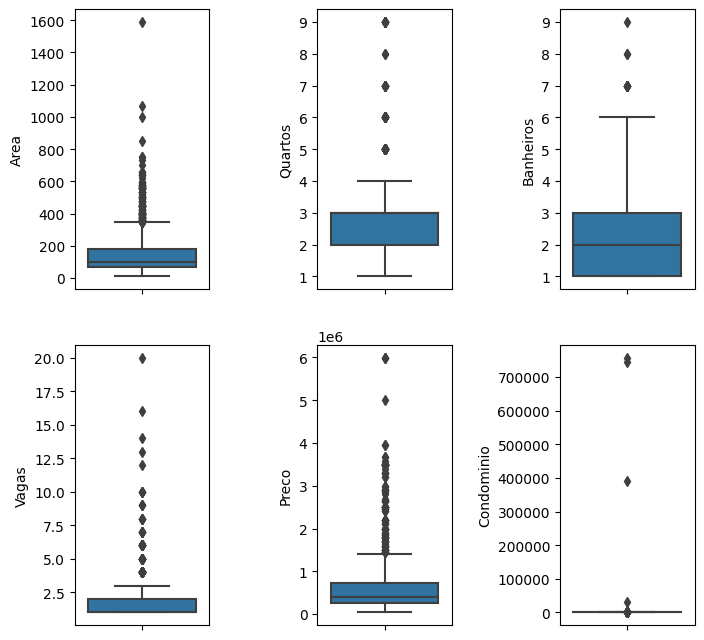

In [420]:
# Captura os nomes das colunas numéricas
num_vars = df.select_dtypes(include=['int', 'float']).columns
# Cria um grid com duas linhas e três colunas
fig, axes = plt.subplots(2, 3, figsize=(8,8))
plt.subplots_adjust(wspace=0.8)

# Itera pelo grid plotando os gráficos
idx = 0
for row in range(2):
  for col in range(3):
    ax = axes[row, col]
    sns.boxplot(y=num_vars[idx], data=df, ax=ax)
    idx += 1

Todos os atributos numéricos possuem valores consistentes com os tipos de dados estabelecidos. No entanto, alguns resultados chamam a atenção:

- O número máximo de vagas na garagem parece bastante extremo (20). Este valor pode estar relacionado a uma casa muito grande, porém deve ser investigado;

- Os valores mínimo (R\$ 1,00) e máximo (R\$ 757.210,00) para a contribuição mensal de condomínio parecem bastante extremos. É improvável que estes valores reflitam a realidade, e portanto devem ser analisados com mais detalhes.

Começaremos analisando o número de vagas de garagem.

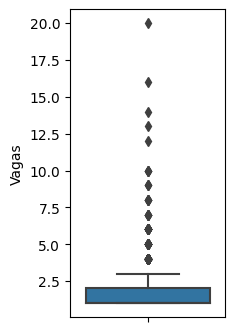

In [421]:
plt.figure(figsize=(2,4))
ax = sns.boxplot(y="Vagas", data=df)

In [422]:
df[df["Vagas"]>3]["Tipo_de_Moradia"].value_counts()

Casa           148
Apartamento      6
Name: Tipo_de_Moradia, dtype: int64

Pelo boxplot, valores de vaga de garagem superiores a três seriam considerados *outliers*. Desse conjunto (`Vagas` > 3), apenas 6 de 154 imóveis são apartamentos. Analisaremos esses 6 registros com maior profundidade.

In [423]:
df[(df["Vagas"]>3)&(df["Tipo_de_Moradia"]=="Apartamento")]

,Tipo_de_Moradia,Bairro,Area,Quartos,Banheiros,Vagas,Preco,Condominio,Aceita_Animais,Area_de_Servico,Churrasqueira,Elevador,Varanda,Piscina,Condominio_Fechado,Espaco_Gourmet,Portao_Eletronico,Quintal_ou_Jardim
132,Apartamento,Granbery,130.0,3.0,2.0,13.0,680000,1100.0,True,False,False,True,True,False,True,True,False,False
442,Apartamento,Bom Pastor,227.0,4.0,6.0,4.0,2000000,800.0,False,True,False,True,True,False,False,True,False,False
504,Apartamento,Santa Helena,10.0,5.0,3.0,4.0,2850000,1000.0,False,False,False,True,True,False,False,True,True,False
505,Apartamento,Santa Helena,180.0,4.0,4.0,4.0,1680000,NaN,True,False,False,True,True,False,False,True,True,False
690,Apartamento,São Mateus,250.0,4.0,4.0,5.0,460000,NaN,False,False,False,False,False,False,False,False,False,False
1173,Apartamento,Jardim Glória,98.0,2.0,2.0,9.0,369900,298.0,True,False,False,False,False,False,False,False,True,False


Desses 6 registros, 3 não possuem um número de vagas compatível com a área ou valor do imóvel:

- O registro 132, com 13 vagas de garagem para uma área de imóvel de 130 m$^2$;

- O registro 504, com 4 vagas de garagem para apenas 10 m$^2$ de imóvel;

- O registro 1173, com 9 vagas de garagem para apenas 98 m$^2$ de área total.

Embora esses valores chamem a atenção, não é possível afirmar com total certeza que se tratam de erros de preenchimento. Como os demais valores são referentes a casas, onde a percepção de uma vaga de garagem é mais subjetiva e as áreas totais em geral maiores, será considerado que esses valores também são válidos.

Agora serão analisados os valores extremos de `Condominio`.

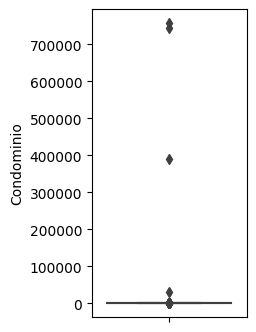

In [424]:
plt.figure(figsize=(2,4))
ax = sns.boxplot(y="Condominio", data=df)

In [425]:
df[df["Condominio"]>1500]

,Tipo_de_Moradia,Bairro,Area,Quartos,Banheiros,Vagas,Preco,Condominio,Aceita_Animais,Area_de_Servico,Churrasqueira,Elevador,Varanda,Piscina,Condominio_Fechado,Espaco_Gourmet,Portao_Eletronico,Quintal_ou_Jardim
187,Casa,São Mateus,174.0,4.0,3.0,NaN,745000,745000.0,False,True,False,False,False,False,False,False,False,False
304,Apartamento,Cascatinha,53.0,2.0,2.0,1.0,320000,30000.0,True,False,False,True,True,True,False,False,False,False
689,Apartamento,São Mateus,112.0,2.0,3.0,2.0,620000,757210.0,False,False,False,True,True,False,False,True,False,False
1336,Apartamento,Grama,133.0,2.0,2.0,NaN,390000,390000.0,False,False,False,False,False,False,False,False,False,True


Apenas quatro imóveis possuem valores de condomínio superiores a R\$ 1.500,00. É possível perceber que, para esses registros, o valor do condomínio é comparável ou por vezes superior ao próprio valor do imóvel, o que certamente indica um erro de preenchimento.

In [426]:
df[df["Condominio"]==1.0].shape[0]

39

Por outro lado, 39 imóveis possuem um valor simbólico de condomínio igual a R\$ 1,00. Isso pode indicar um preenchimento padrão para casos em que não existia cobrança de condomínio, de forma a não deixar esse campo em branco.

A seguir, temos um resumo estatístico dos atributos numéricos.

In [427]:
df[num_vars].mode()

,Area,Quartos,Banheiros,Vagas,Preco,Condominio
0,70.0,2.0,2.0,1.0,280000,250.0
1,NaN,NaN,NaN,NaN,350000,NaN


| Atributo       | Mínimo  | Máximo   | Mediana | Moda         | Média       | Desvio-Padrão | Valores Ausentes |
|----------------|---------|----------|---------|------------- |------------  |--------------  |------------------ |
| Area           | 10      | 1590     | 100     | 70          | 152.148692  | 133.380323    | 0                |
| Quartos        | 1       | 9        | 3       | 2           | 2.807029    | 1.129052      | 2                |
| Banheiros      | 1       | 9        | 2       | 2           | 2.292278    | 1.314556      | 0                |
| Vagas          | 1       | 20       | 1       | 1           | 1.951435    | 1.564705      | 208              |
| Preco          | 40000   | 5990000  | 389000  | 280000 e 350000 | 621353.1  | 667445.0      | 0                |
| Condominio     | 1       | 757210   | 250     | 250         | 2881.862348 | 41514.020787  | 826              |

A partir da tabela, é possível realizar as seguintes observações:

- A distribuição da `Area` possui alta variablidade, devido ao seu valor de desvio-padrão elevado, próximo à média. A distribuição também é dita assimétrica positiva ou assimétrica à direita, com Moda < Mediana < Média;

- A distribuição do `Preco` também possui alta variabilidade, com desvio-padrão superior ao valor da média. Essa distribuição é bimodal (nos valores de R\$ 280.000,00 e R\$ 350.000,00) e assimetrica positiva;

- O desvio-padrão de `Condominio` é demasiadamente elevado, o que pode ser explicado pela presença de valores discrepantes advindos de erros de preenchimento, como detalhado anteriormente. Esses valores serão corrigidos na etapa de pré-processamento.

### Visualizações

#### Visualizações unimodais

Como uma primeira análise visual, serão verificadas as distribuições de cada atributo numérico.

In [428]:
# Define uma cor padrão
cor_padrao = "#6688AA"

# Carrega uma folha de estilos
plt.style.use("ggplot")

# Modifica alguns parâmetros gráficos
plt.rc("axes", facecolor="#fafafa", grid=True)
plt.rc("grid", color="f0f0f0")

# plt.rcdefaults() # Restaura a configuração padrão

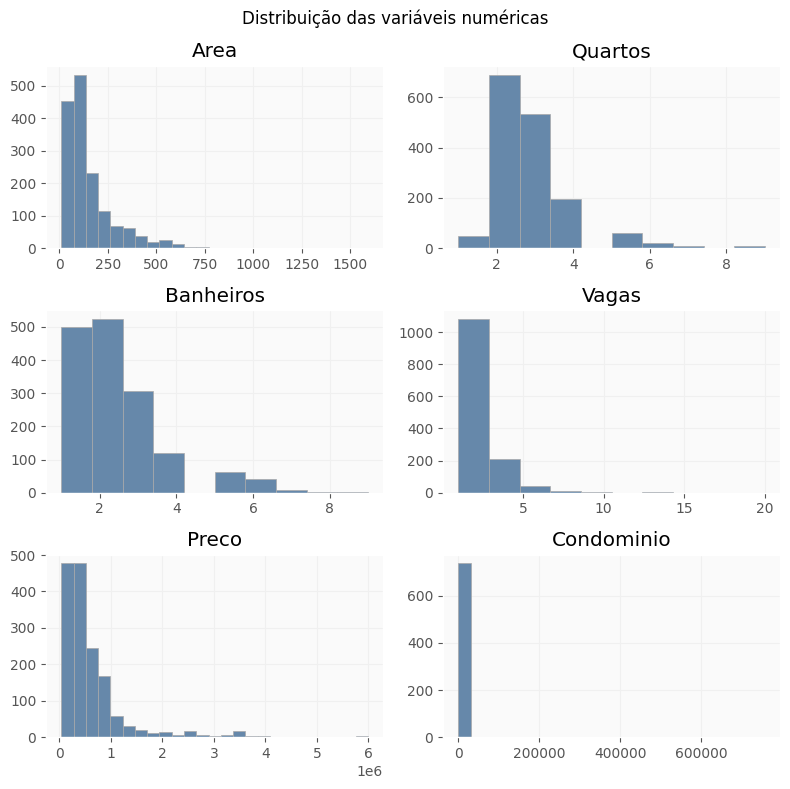

In [429]:
# Cria um grid com três linhas e duas colunas
fig, axes = plt.subplots(3, 2, figsize=(8,8))
plt.subplots_adjust(hspace=0.4)

# Itera pelo grid plotando os gráficos
idx = 0
for row in range(3):
  for col in range(2):
    ax = axes[row, col]
    # Diferenciando variáveis numéricas com poucos valores distintos
    if len(df[num_vars[idx]].unique())<20: bins = 10
    else: bins = 25
    ax.hist(df[num_vars[idx]], bins=bins, color=cor_padrao, edgecolor='darkgray')
    ax.set_title(num_vars[idx])
    idx += 1

# Adiciona um título ao gráfico
plt.suptitle("Distribuição das variáveis numéricas")
# Elimina margens desnecessárias
plt.tight_layout()

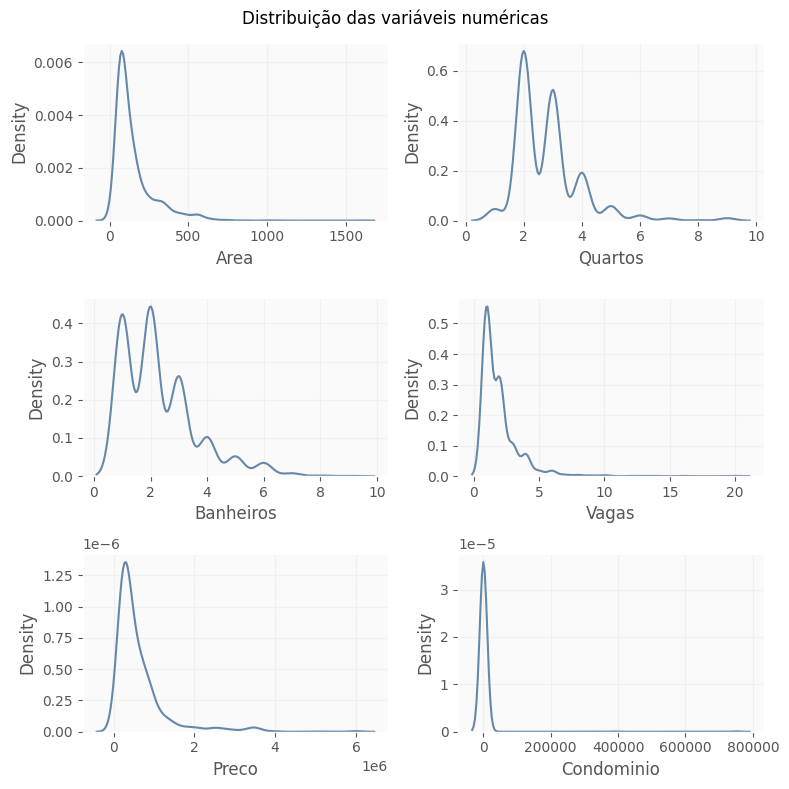

In [430]:
# Cria um grid com três linhas e duas colunas
fig, axes = plt.subplots(3, 2, figsize=(8,8))
plt.subplots_adjust(hspace=0.4)

# Itera pelo grid plotando os gráficos
idx = 0
for row in range(3):
  for col in range(2):
    ax = axes[row, col]
    # Diferenciando variáveis numéricas com poucos valores distintos
    if len(df[num_vars[idx]].unique())<20: bins = 10
    else: bins = 25
    sns.kdeplot(data=df[num_vars[idx]], color=cor_padrao, ax=ax)
    idx += 1

# Adiciona um título ao gráfico
plt.suptitle("Distribuição das variáveis numéricas")
# Elimina margens desnecessárias
plt.tight_layout()

Pelas visualizações apresentadas acima, é possível perceber que as distribuições das variáveis numéricas são mais próximas de distribuições exponenciais, e não gaussianas. Sendo assim, na etapa de transformação dos dados, é provável que a operação de normalização seja mais eficaz que a de padronização ao tentar ajustar esses valores para uma escala comum.

Em seguida, serão criadas visualizações para a contagem de categorias para cada atributo categórico/booleano. Nesse contexto, atributos booleanos podem ser considerados atributos categóricos com duas categorias: Verdadeiro ou Falso.

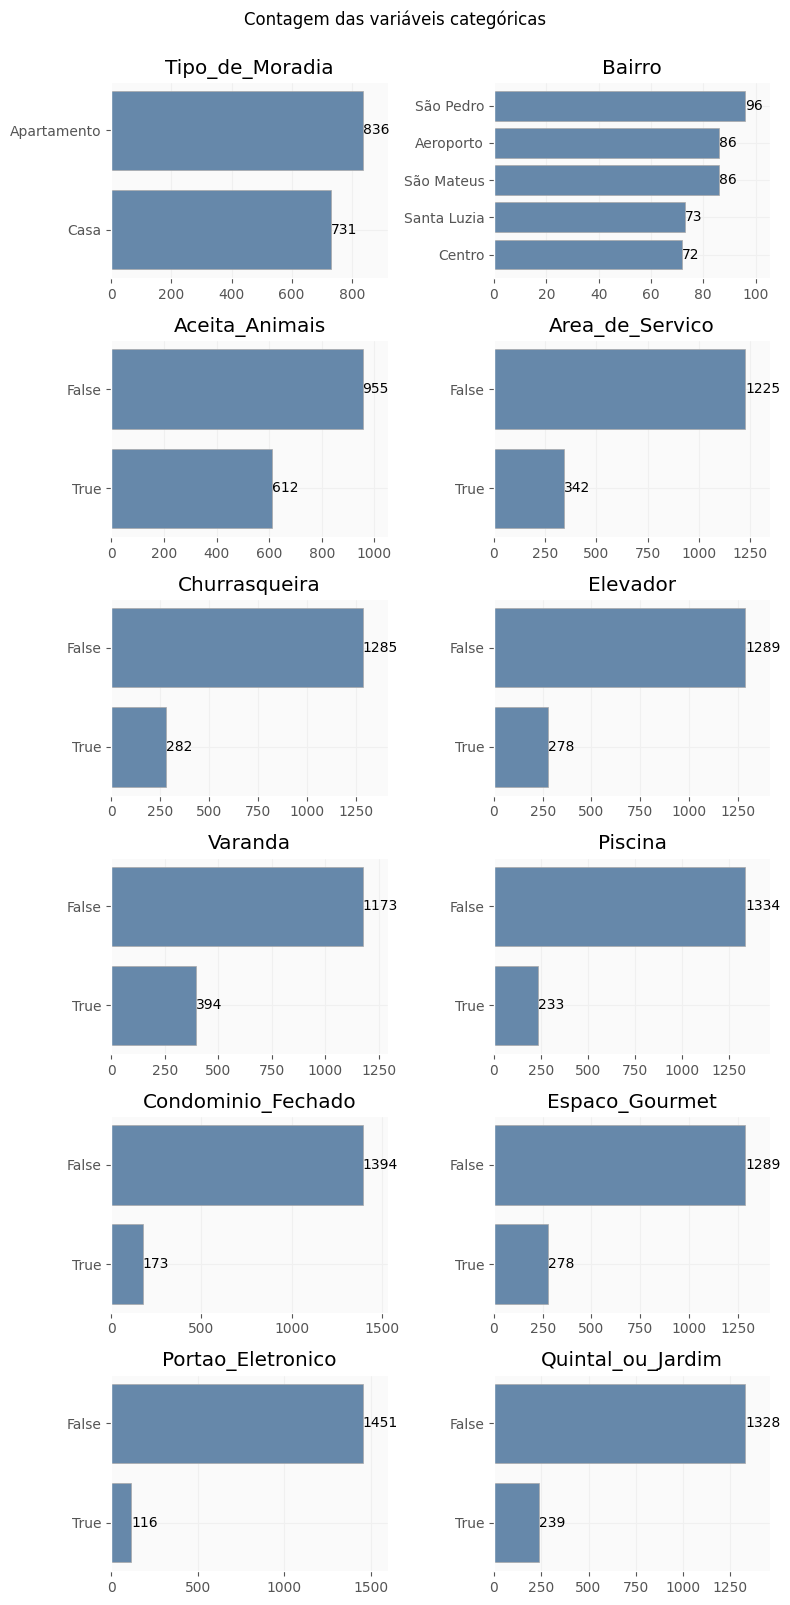

In [431]:
# Captura os nomes das colunas categóricas
cat_vars = df.select_dtypes(include=['object', 'bool']).columns

# Cria um grid com três linhas e duas colunas
fig, axes = plt.subplots(6, 2, figsize=(8,16))
plt.subplots_adjust(hspace=0.2)

# Itera pelo grid plotando os gráficos
idx = 0
for row in range(6):
  for col in range(2):
    ax = axes[row, col]
    cats = df[cat_vars[idx]].value_counts().index[:5][::-1]
    cats = [str(cat) for cat in cats]
    values = df[cat_vars[idx]].value_counts().values[:5][::-1]
    ax.barh(y=cats, width=values, color=cor_padrao, edgecolor='darkgray')
    ax.set_xlim(0, values.max()*1.1)
    ax.bar_label(ax.containers[0])
    ax.set_title(cat_vars[idx])
    idx += 1

# Adiciona um título ao gráfico
plt.suptitle("Contagem das variáveis categóricas", y=1.00)
# Elimina margens desnecessárias
plt.tight_layout()

Para a visualização das categorias de `Bairro`, foram escolhidas apenas as cinco classes mais frequentes, evitando a poluição visual do gráfico.

Seria interessante aplicar o one-hot encoder para a variável `Tipo_de_Moradia`, transformando seu valor categórico para uma coluna numérica. Para o caso de `Bairro`, o mesmo procedimento poderia ser realizado, porém antes deveríamos reduzir o número de categorias. Uma proposta seria agrupar bairros em suas respectivas regiões. Porém seria necessário analisar se existe grande disparidade entre bairros de uma mesma região.

Quanto às variáveis booleanas, estas podem ser convertidas para seus valores inteiros 0 (False) e 1 (True), que na prática seria igual a aplicação do one-hot encoder.

#### Visualizações multimodais

Nessa etapa, serão verificadas as relações entre os diferentes atributos do conjunto de dados, buscando entender como a variação em determinada variável afeta as demais. Para o caso das variáveis numéricas, isso pode ser feito através de uma matriz de correlação.

A correlação de Pearson, embora muito utilizada, é recomendada para atributos com distribuição aproximadamente normal. Conforme visto na análise unimodal, as variáveis desse problema não possuem um comportamento gaussiano, e portanto a correlação de Spearman deve ser utilizada.

A correlação de Spearman é dita não-paramétrica, o que significa dizer que esta não realiza suposições sobre a distribuição dos dados. Ela avalia a força e direção de relações monótonas, sendo mais adequada para variáveis que não possuem uma relação linear ou não estão normalmente distribuídas.

Uma relação monótona entre duas variáveis, por sua vez, é uma em que se observa um dos seguintes efeitos: quando o valor de uma variável aumenta, o valor da outra também aumenta, ou, quando o valor de uma variável aumenta, o valor da outra diminui.

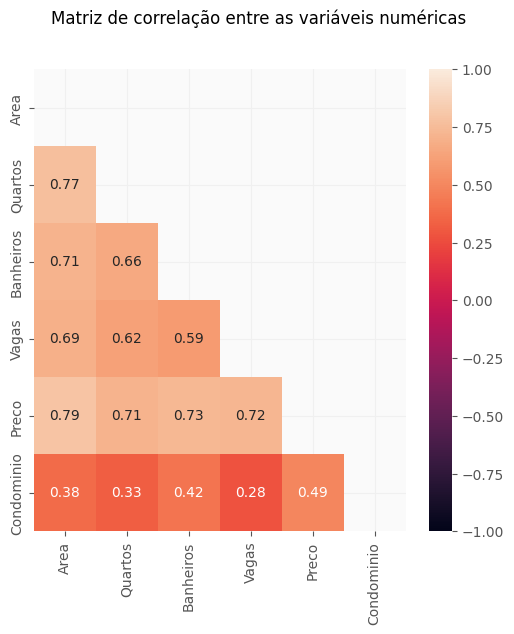

In [432]:
plt.figure(figsize=(6,6))
plt.suptitle("Matriz de correlação entre as variáveis numéricas")
g = sns.heatmap(df[num_vars].corr(method="spearman"), vmin=-1, vmax=+1, annot=True, mask=np.triu(df[num_vars].corr(method="spearman")))

Embora não exista um consenso, a literatura aponta que uma correlação forte ocorre para valores superiores a 0,7. Sendo assim, podemos chegar às seguintes conclusões:

- A correlação mais forte (0,79) ocorre entre a área e o preço do imóvel;

- O preço possui uma forte correlação positiva com a área, número de quartos, banheiros e vagas de garagem;

- A área do imóvel também está fortemente correlacionada com o número de quartos e número de banheiros.

Todas essas observações estão bastante alinhadas com a percepção de valor de um imóvel que as pessoas possuem, de modo geral. Quanto maior o imóvel e seu número de cômodos, mais caro este deve ser.

Em seguida, a correlação entre atributos numéricos será analisada a partir de gráficos de dispersão. **Obs: Os gráficos de dispersão podem demorar um pouco para serem gerados.**

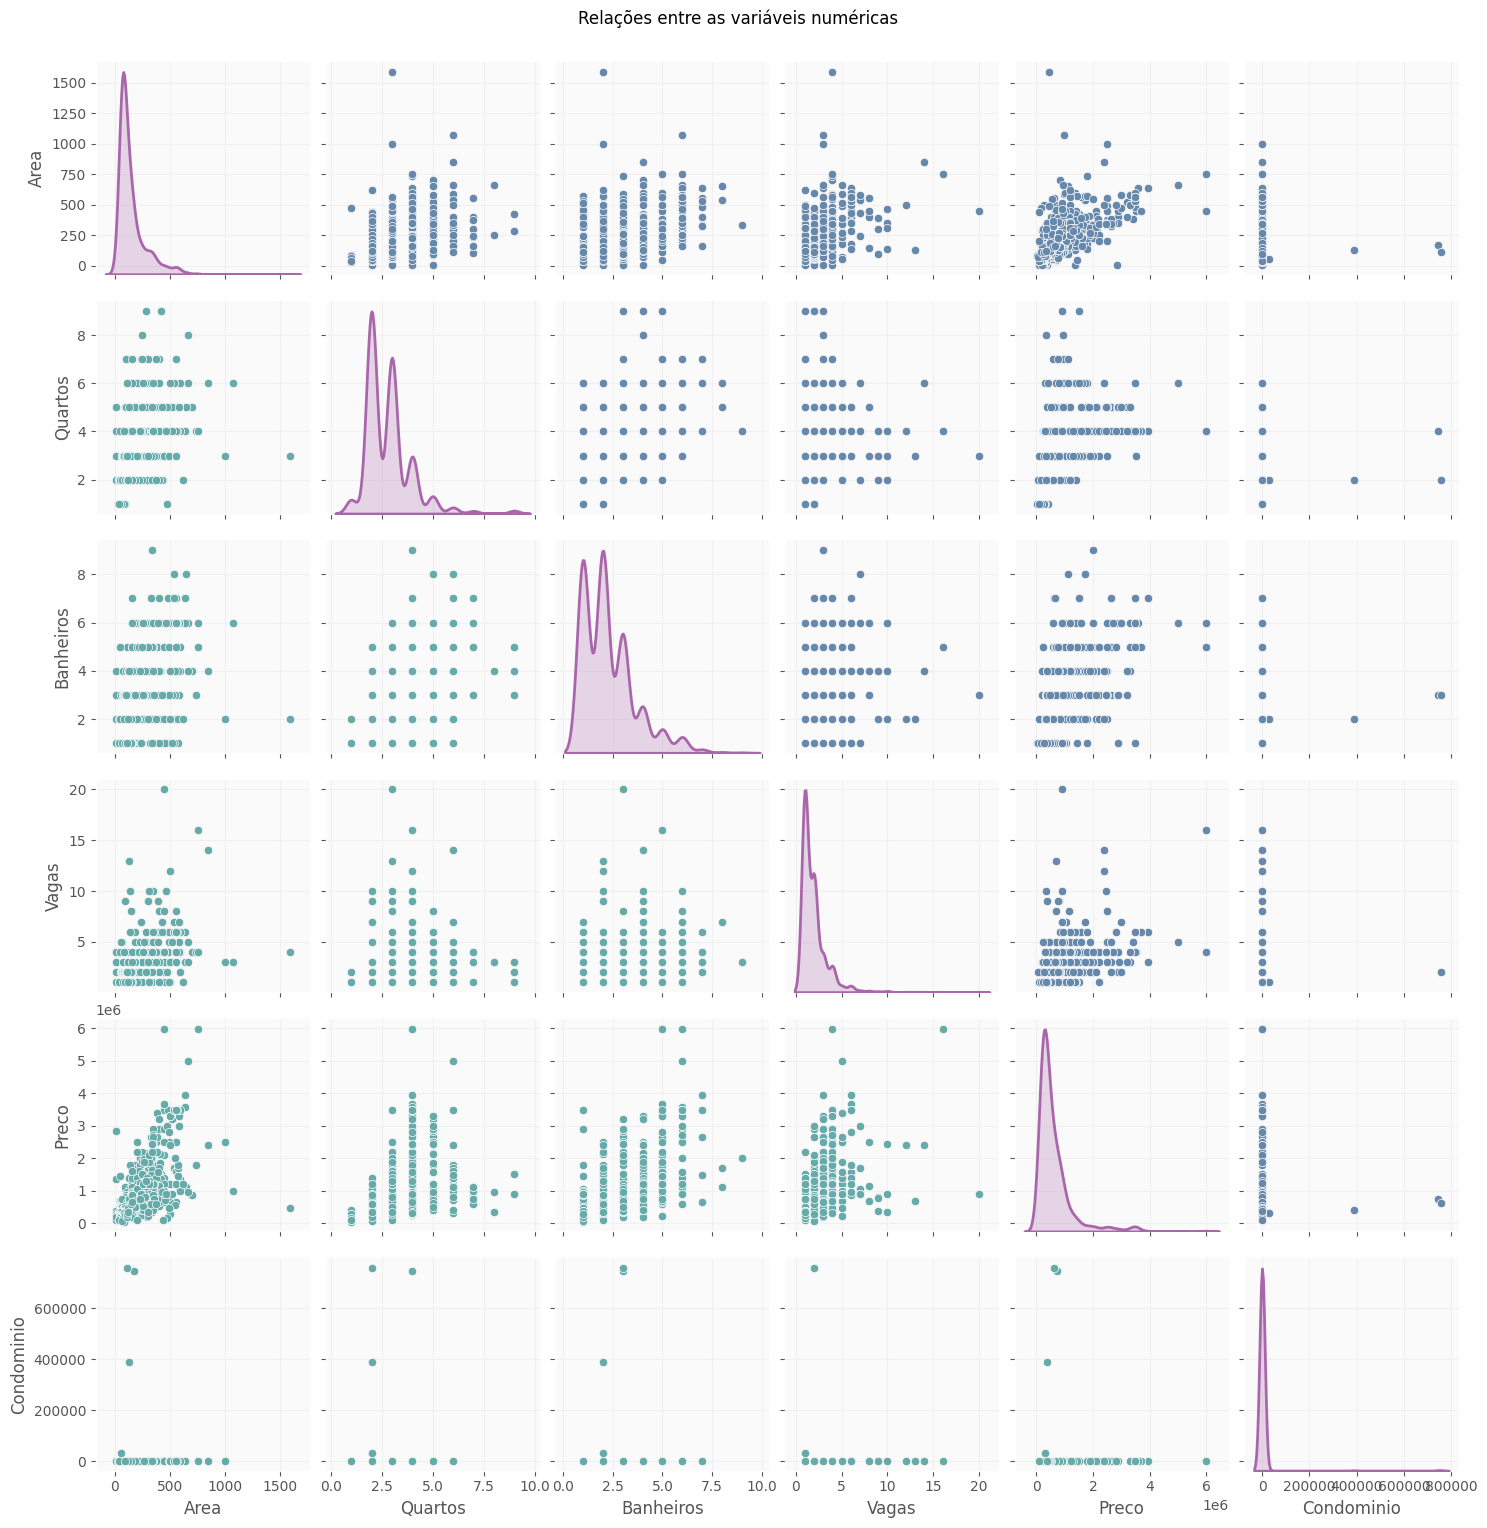

In [433]:
g = sns.pairplot(df[num_vars], diag_kind="kde", diag_kws={"color": "#AA66AA",
                                                          "linewidth": 2})

# Altera a cor dos gráficos superior e inferior
g.map_upper(sns.scatterplot, color=cor_padrao)
g.map_lower(sns.scatterplot, color="#66AAAA")

# Adiciona um título ao gráfico
g.fig.suptitle("Relações entre as variáveis numéricas", y=1.02)
plt.show()

Do gráfico de dispersão, podemos ver a clara correlação positiva entre o preço e a área do imóvel. Também é possível perceber que os valores extremos (e incorretos) de `Condominio` atrapalham a análise dessa variável. Sendo assim, após o pré-processamento dos dados, seria interessante retornar essas avaliações.

Em seguida, será analisado o comportamento das variável alvo, `Preco`, para os diferentes grupos das variáveis categóricas.

In [434]:
bool_vars = df.select_dtypes(include="bool").columns

# Transformando as variáveis booleanas para categóricas
for var in bool_vars:
  df[var] = df[var].astype(str)

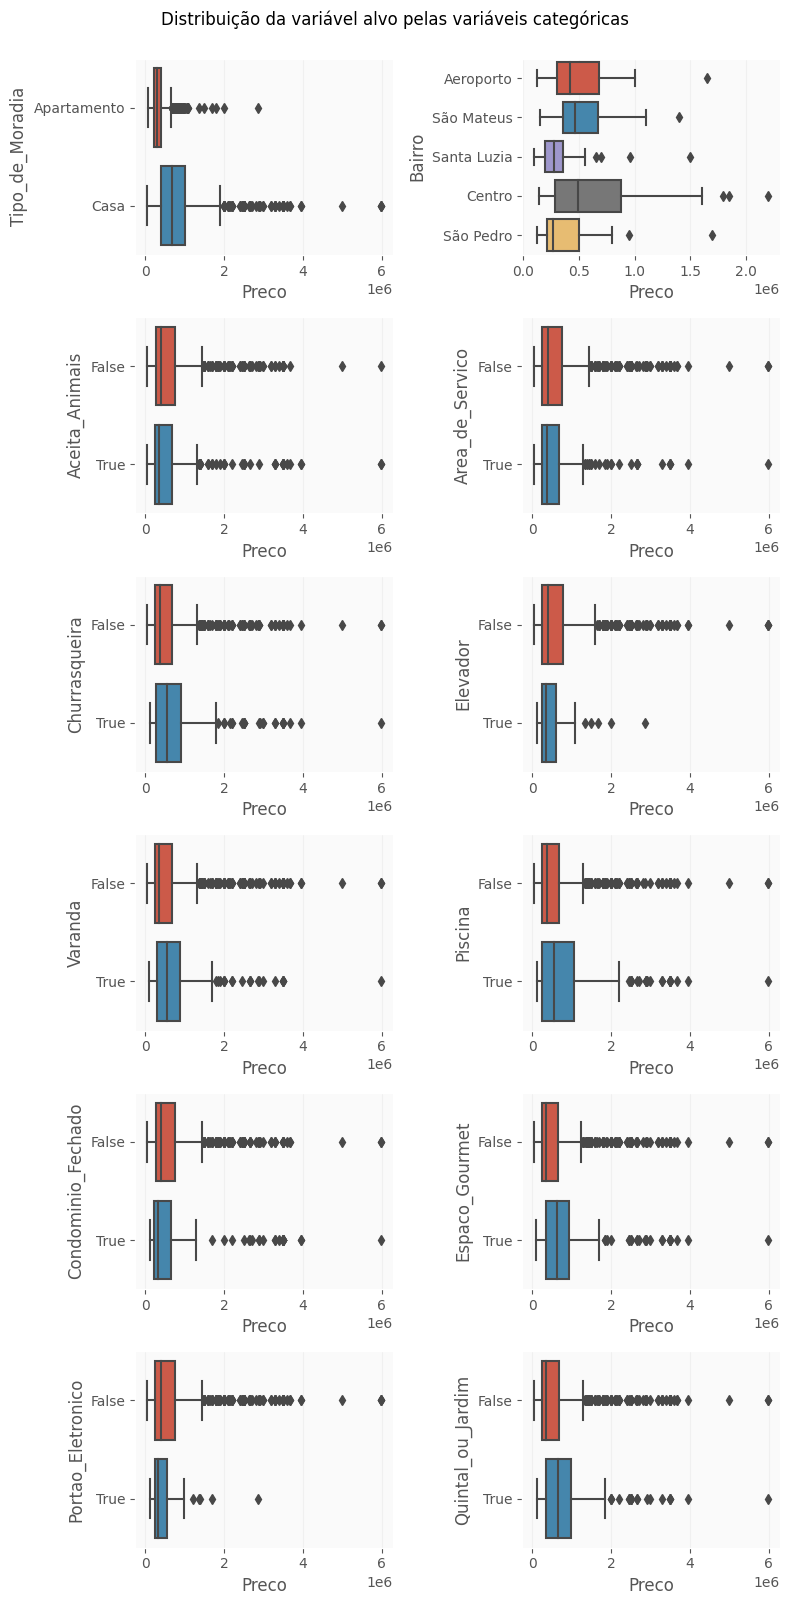

In [435]:
# Cria um grid com três linhas e duas colunas
fig, axes = plt.subplots(6, 2, figsize=(8,16))
plt.subplots_adjust(hspace=0.2)

# Itera pelo grid plotando os gráficos
idx = 0
for row in range(6):
  for col in range(2):
    ax = axes[row, col]
    cats = df[cat_vars[idx]].value_counts().index[:5]
    sns.boxplot(x="Preco", y=cat_vars[idx], data=df[df[cat_vars[idx]].isin(cats)], ax=ax)
    idx += 1

# Adiciona um título ao gráfico
plt.suptitle("Distribuição da variável alvo pelas variáveis categóricas", y=1.00)
# Elimina margens desnecessárias
plt.tight_layout()

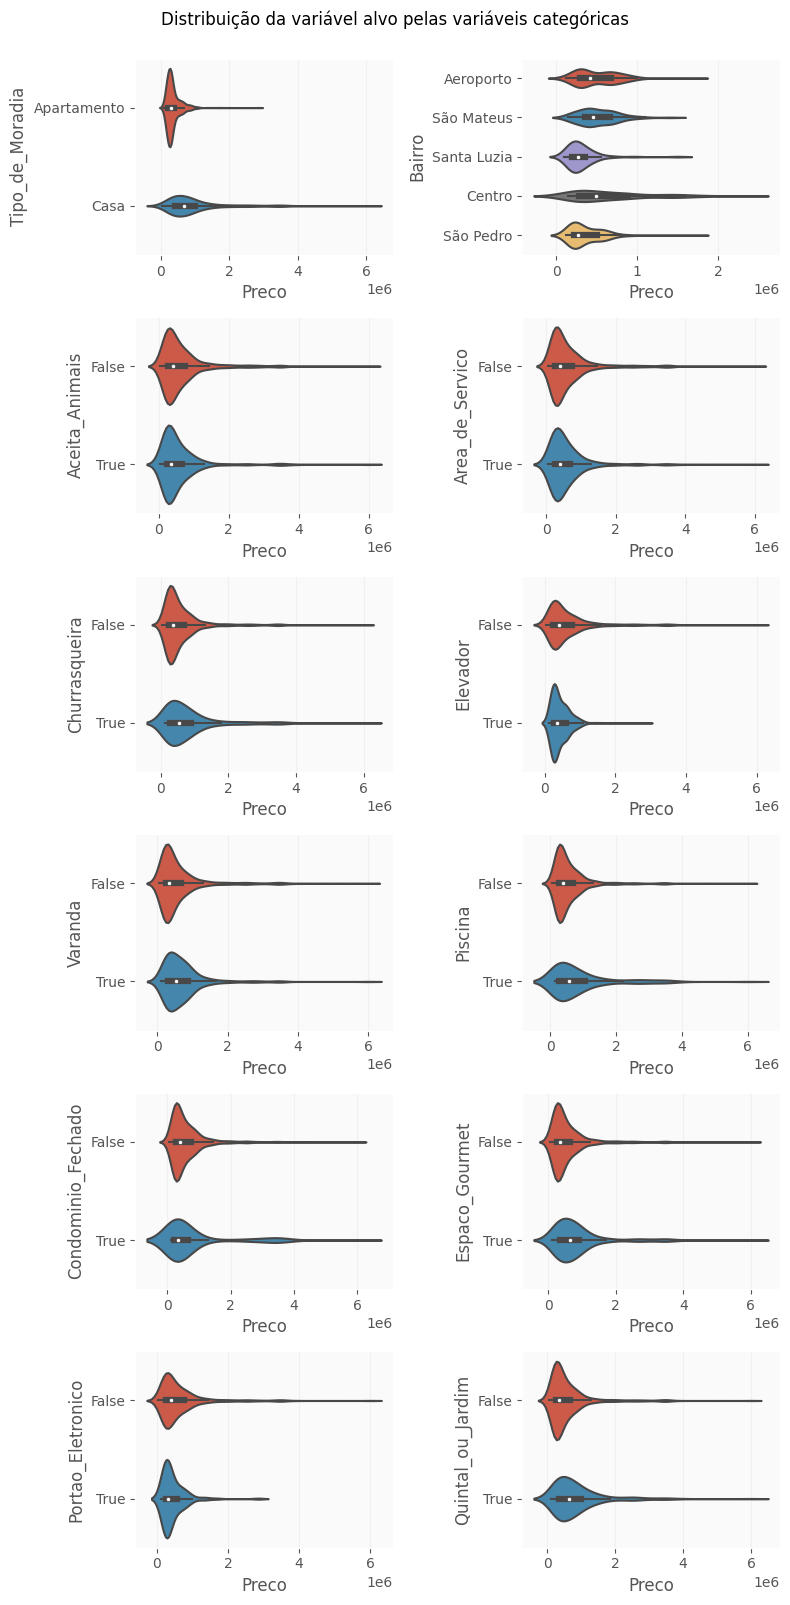

In [436]:
# Cria um grid com três linhas e duas colunas
fig, axes = plt.subplots(6, 2, figsize=(8,16))
plt.subplots_adjust(hspace=0.2)

# Itera pelo grid plotando os gráficos
idx = 0
for row in range(6):
  for col in range(2):
    ax = axes[row, col]
    cats = df[cat_vars[idx]].value_counts().index[:5]
    sns.violinplot(x="Preco", y=cat_vars[idx], data=df[df[cat_vars[idx]].isin(cats)], ax=ax)
    idx += 1

# Adiciona um título ao gráfico
plt.suptitle("Distribuição da variável alvo pelas variáveis categóricas", y=1.00)
# Elimina margens desnecessárias
plt.tight_layout()

Do gráfico, podemos perceber que:

- As casas possuem, de modo geral, preço maior que os apartamentos;

- O bairro com imóveis mais caros é o Centro, enquanto o bairro com imóveis mais baratos é Santa Luzia (dentre os cinco mais populares);

- Residências com churrasqueira, varanda, piscina, espaço gourmet ou quintal/jardim são mais caros;

- Os imóveis com elevador parecem mais baratos, mas deve existir um outro fator por trás: grande parte dos imóveis sem elevador são casas, cujo preço em geral é superior.

In [437]:
df[df["Elevador"]=="True"]["Tipo_de_Moradia"].value_counts()

Apartamento    278
Name: Tipo_de_Moradia, dtype: int64

Como esperado, apenas apartamentos possuem elevador.

Podemos aplicar um teste estatístico de forma a obtermos provas matemáticas de que existe uma diferença estatisticamente significativa entre os grupos da variável numérica gerados pela variável categórica. O teste estatístico adequado para esse cenário, onde temos uma variável categórica com dois grupos e uma variável numérica (`Preco`), pode ser o Teste t, caso a distribuição da variável numérica seja normal, ou o Mann-Whitney, caso contrário.

Podemos verificar numericamente se a distribuição de `Preco` é normal através do teste de Shapiro-Wilk. A hipótese nula desse teste é de que a variável avaliada possui uma distribuição normal. Vamos definir nosso nível de significância em 5% ou 0.05, ou seja, caso a probabilidade de obtermos um resultado mais extremo que o apresentado (dada pelo p-valor do teste estatístico) seja menor que 5%, rejeitaremos a hipótese nula. Nesse caso, a distribuição não pode ser considerada como uma distribuição normal.

In [438]:
def shapiro_test(df, var, alpha=0.05, to_print=False):
  stats, pvalor = shapiro(df[var])
  if pvalor < alpha:
    if to_print:
      print("A hipótese nula foi rejeitada para o nível de significância escolhido.")

  return stats, pvalor

In [439]:
stats, pvalor = shapiro_test(df, "Preco", to_print=True)

print((stats, pvalor))

A hipótese nula foi rejeitada para o nível de significância escolhido.
(0.640780508518219, 0.0)


Dado que a hipótese nula foi rejeitada e a distribuição não é gaussiana, podemos prosseguir aplicando o teste não-paramétrico de Mann-Whitney. A hipótese nula desse teste é de que as distribuições são suficientemente semelheantes.

In [440]:
def mannwhitney_test(df, var_num, var_cat, alpha=0.05, to_print=False):
  groups = df.groupby(var_cat)[var_num].apply(list)
  stats, pvalor = mannwhitneyu(x=groups[0], y=groups[1])
  if pvalor < alpha:
    if to_print:
      print("A hipótese nula foi rejeitada para o nível de significância escolhido.")

  return stats, pvalor

In [441]:
results = []
for var in cat_vars:
  stats, pvalor = mannwhitney_test(df, "Preco", var)
  res = "Não rejeitado"
  if pvalor < 0.05: res = "Rejeitado"
  results.append({"Variavel": var,
                  "Estatistica": stats,
                  "Pvalor": pvalor,
                  "Resultado": res})

pd.DataFrame(results)

,Variavel,Estatistica,Pvalor,Resultado
0,Tipo_de_Moradia,114641.5,2.803102e-101,Rejeitado
1,Bairro,2048.0,1.636368e-02,Rejeitado
2,Aceita_Animais,316370.5,5.737336e-03,Rejeitado
3,Area_de_Servico,214637.5,4.853657e-01,Não rejeitado
4,Churrasqueira,151438.5,1.539343e-05,Rejeitado
5,Elevador,199339.0,3.204928e-03,Rejeitado
6,Varanda,172542.0,4.953837e-14,Rejeitado
7,Piscina,134812.5,1.228349e-03,Rejeitado
8,Condominio_Fechado,131866.5,4.439101e-02,Rejeitado
9,Espaco_Gourmet,121540.0,3.689324e-17,Rejeitado


Para o nível de significância escolhido de 0,05, o teste não foi rejeitado apenas para `Area_de_Servico`. Sendo assim, podemos dizer que o preço não é significativamente influenciado pela presença ou não de área de serviço no imóvel. Todas as outras variáveis categóricas, no entanto, impactam no preço da casa ou apartamento avaliado.

Seria interessante, ainda, avaliar a relação existente entre três variáveis: a área e o preço de um imóvel e o tipo de moradia.

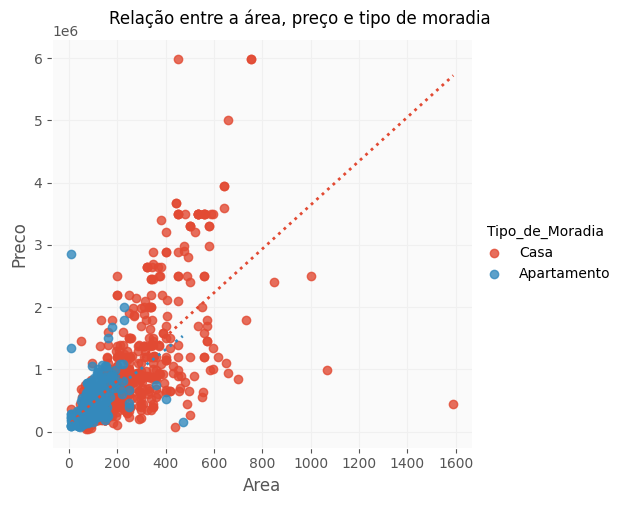

In [442]:
g = sns.lmplot(x="Area", y="Preco",
               hue="Tipo_de_Moradia", hue_order=["Casa", "Apartamento"],
               data=df, ci=False, line_kws={"linestyle": ":",
                                            "linewidth": 2})
# Adiciona um título ao gráfico
plt.suptitle("Relação entre a área, preço e tipo de moradia", y=1.00)
plt.show()

É possível observar que a área dos apartamentos é bem menor que a das casas, assim como seu preço. Para ambos os tipos de moradia, existe uma correlação positiva entre a área do imóvel e seu preço, porém essa relação parece ainda mais forte para as casas.

## Pré-processamento de dados

### Tratamento de valores faltantes

Como primeiro passo da etapa de pré-processamento, os valores faltantes serão tratados. A biblioteca `missingno` será utilizada para se obter uma visualização dos atributos com valores faltantes.

<Axes: >

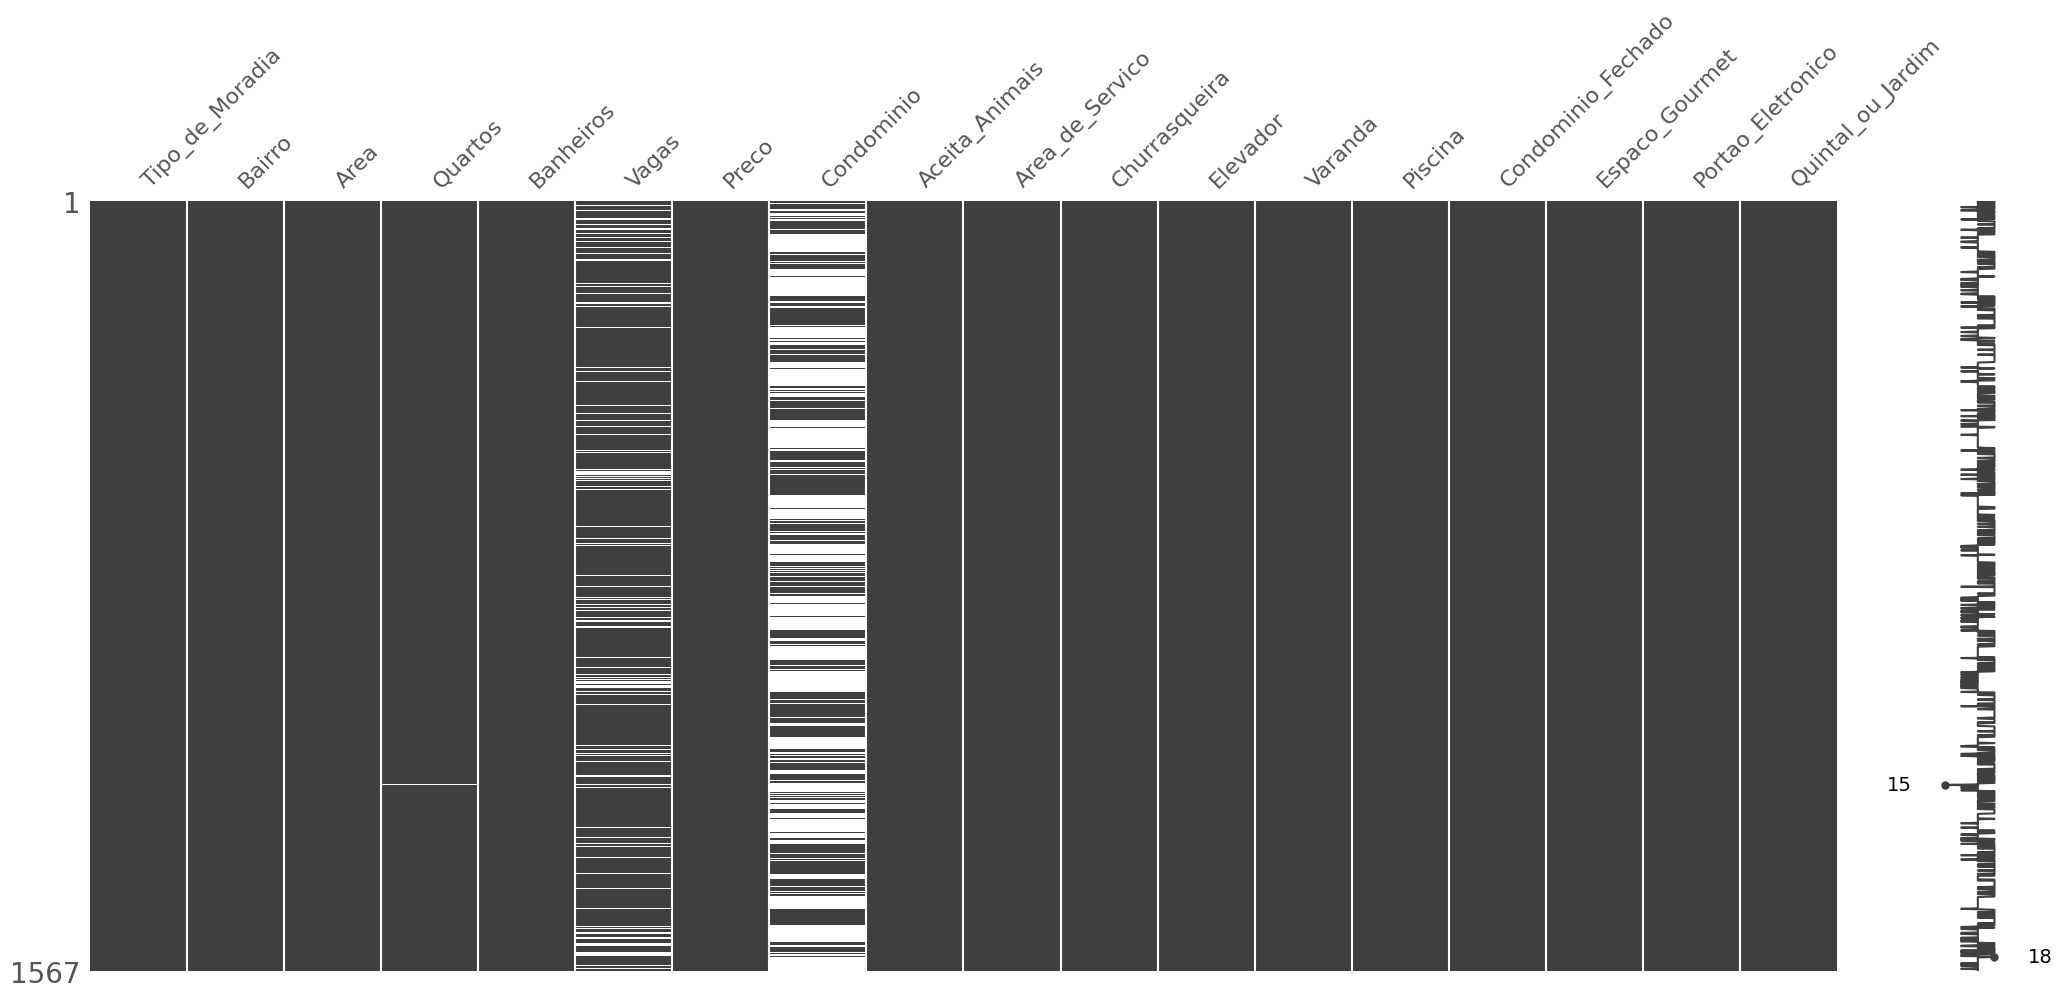

In [443]:
msno.matrix(df)

Começaremos olhando para os valores faltantes de `Quartos`.

In [444]:
df[df["Quartos"].isnull()]

,Tipo_de_Moradia,Bairro,Area,Quartos,Banheiros,Vagas,Preco,Condominio,Aceita_Animais,Area_de_Servico,Churrasqueira,Elevador,Varanda,Piscina,Condominio_Fechado,Espaco_Gourmet,Portao_Eletronico,Quintal_ou_Jardim
710,Casa,Bairu,180.0,NaN,2.0,4.0,850000,NaN,False,False,False,False,False,False,False,False,False,False
1187,Casa,Jardim Glória,67.0,NaN,2.0,NaN,750000,NaN,False,False,False,False,False,True,False,False,False,True


Não parece existir uma justificativa óbvia para a ausência desses valores, sendo portanto difícil prevê-los. Como se tratam de apenas dois registros, podemos descartá-los do conjunto de dados sem grandes prejuízos.

In [445]:
df = df.dropna(subset=["Quartos"]).reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tipo_de_Moradia     1565 non-null   object 
 1   Bairro              1565 non-null   object 
 2   Area                1565 non-null   float64
 3   Quartos             1565 non-null   float64
 4   Banheiros           1565 non-null   float64
 5   Vagas               1358 non-null   float64
 6   Preco               1565 non-null   int64  
 7   Condominio          741 non-null    float64
 8   Aceita_Animais      1565 non-null   object 
 9   Area_de_Servico     1565 non-null   object 
 10  Churrasqueira       1565 non-null   object 
 11  Elevador            1565 non-null   object 
 12  Varanda             1565 non-null   object 
 13  Piscina             1565 non-null   object 
 14  Condominio_Fechado  1565 non-null   object 
 15  Espaco_Gourmet      1565 non-null   object 
 16  Portao

Para a variável `Vagas`, será considerado que os casos com valores ausentes são referentes a imóveis sem vagas de garagem (0).

In [446]:
df["Vagas"] = df["Vagas"].fillna(0)

df["Vagas"].describe()

count    1565.000000
mean        1.692013
std         1.599942
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        20.000000
Name: Vagas, dtype: float64

Os valores faltantes em `Condominio` são mais delicados. Quando o tipo de moradia é uma casa, é possível que os imóveis com valores faltantes para esse atributo não possuam cobrança de condomínio. Para o caso dos apartamentos, no entanto, esse cenário é improvável.

In [447]:
df[df["Condominio"].isnull()].groupby("Tipo_de_Moradia").size()

Tipo_de_Moradia
Apartamento    191
Casa           633
dtype: int64

Grande parte dos imóveis com valores faltantes de `Condominio` de fato são casas, porém ainda é possível observar 191 apartamentos neste subconjunto.

Da matriz de correlação calculada anteriormente, vimos que o atributo com relação mais forte com `Condomio` foi `Preco`, apresentando um coeficiente de Spearman de 0,49. Sendo assim, foi decidido utilizar a proporção mediana entre preço do imóvel e valor de condomínio para preencher os registros faltantes, nos casos em que a moradia é um apartamento.

In [448]:
(df[df["Tipo_de_Moradia"]=="Apartamento"]["Condominio"]/df[df["Tipo_de_Moradia"]=="Apartamento"]["Preco"]).median()

0.0009130434782608696

O valor de condomínio de um apartamento representa, segundo a mediana, aproximadamente 0,1% do preço do imóvel.

In [449]:
def trata_missings_cond(registro):
  if registro["Tipo_de_Moradia"] == "Apartamento":
    return int(registro["Preco"]*0.001)
  else:
    return 0

In [450]:
df["Condominio"] = df.apply(lambda x: trata_missings_cond(x) if pd.isna(x["Condominio"]) else x["Condominio"], axis=1)

df["Condominio"].describe()

count      1565.000000
mean       1411.558466
std       28590.061193
min           0.000000
25%           0.000000
50%         170.000000
75%         289.000000
max      757210.000000
Name: Condominio, dtype: float64

Como podemos conferir abaixo, todos os valores faltantes foram tratados.

<Axes: >

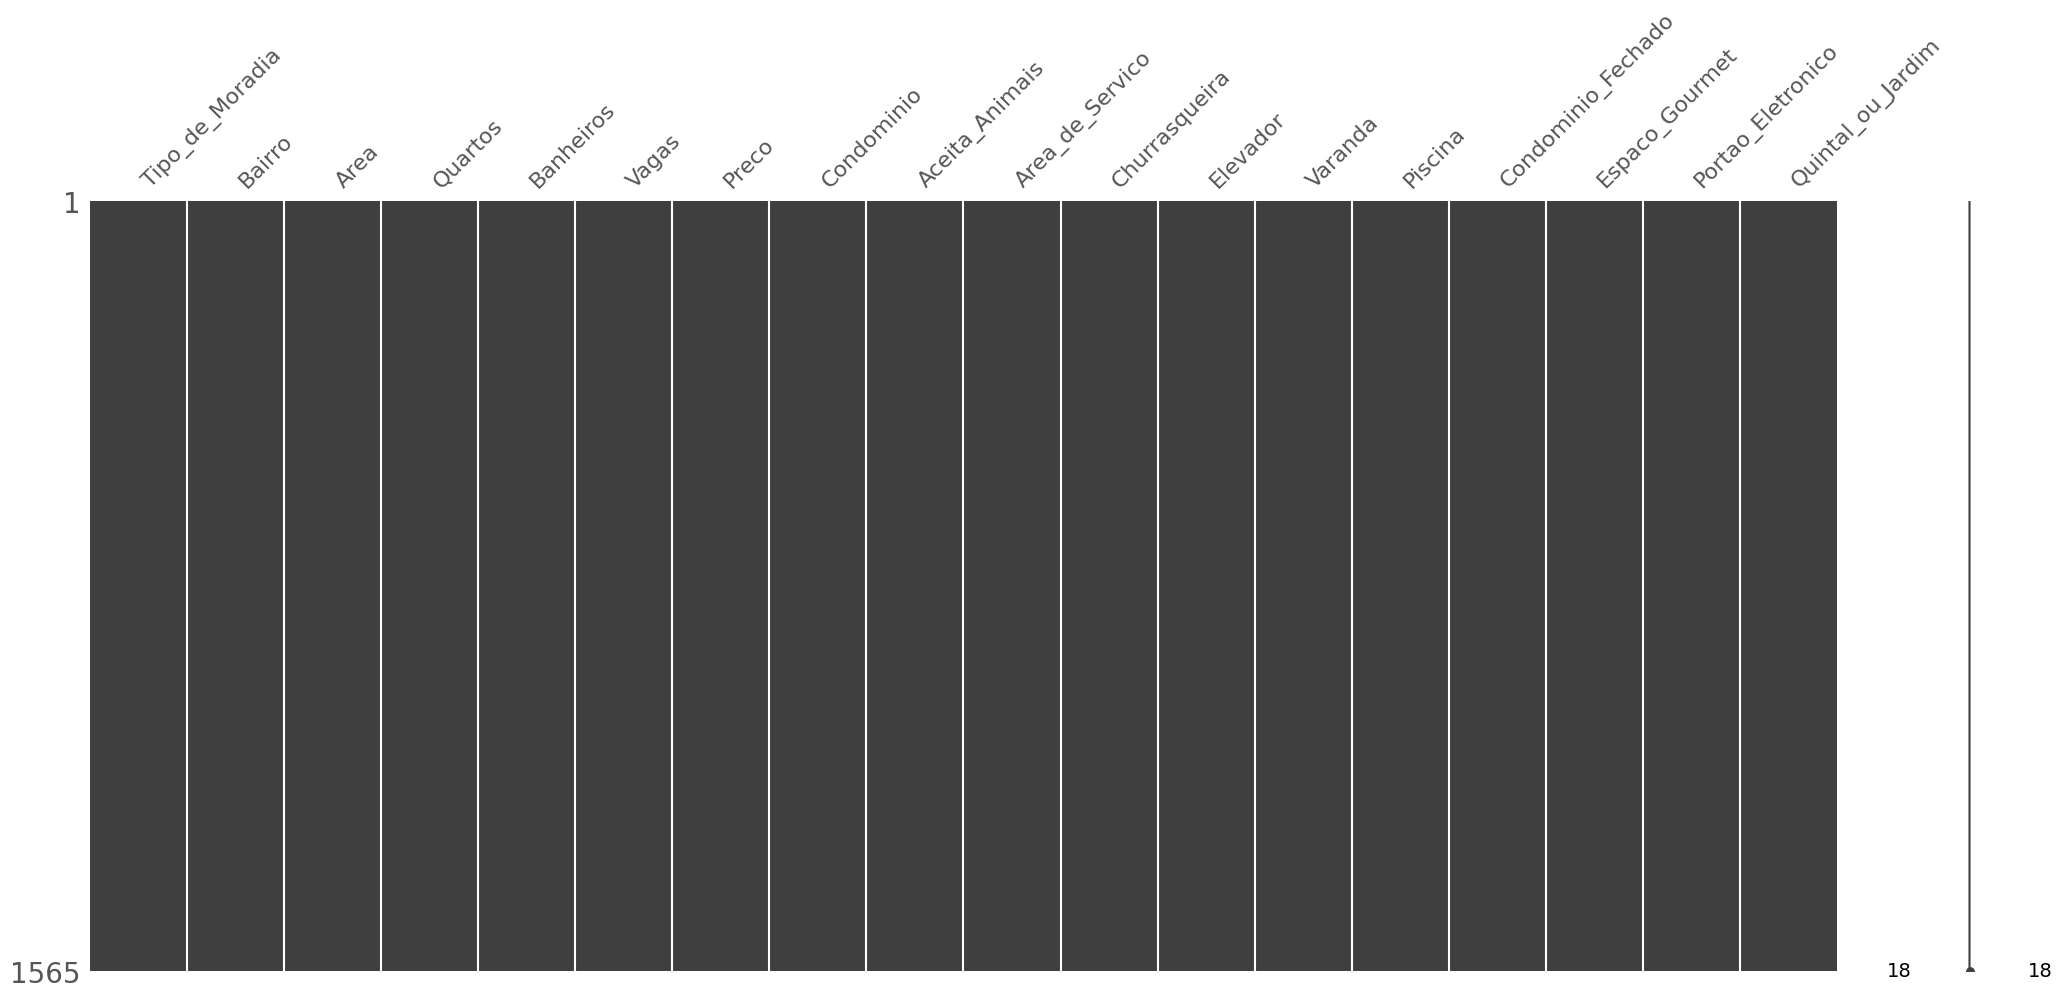

In [451]:
msno.matrix(df)

### Tratamento de valores discrepantes

Como foi percebido nas análises anteriores, existem alguns valores de `Condominio` que certamente foram preenchidos de forma equivocada, sendo necessária uma limpeza do conjunto de dados. Como uma regra de negócios empírica, é extremamente improvável que o valor de condomínio de um imóvel seja superior a 0,5% de seu preço, como podemos ver abaixo:

In [452]:
(df["Condominio"]/df["Preco"]).quantile([0.5, 0.75, 0.9, 0.99])

0.50    0.000486
0.75    0.001000
0.90    0.001218
0.99    0.002022
dtype: float64

In [453]:
(df[df["Tipo_de_Moradia"]=="Apartamento"]["Condominio"]/df[df["Tipo_de_Moradia"]=="Apartamento"]["Preco"]).quantile([0.5, 0.75, 0.9, 0.99])

0.50    0.001000
0.75    0.001083
0.90    0.001394
0.99    0.002362
dtype: float64

Como podemos ver acima, para 99% dos imóveis o valor de condomínio é inferior a 0,21% do preço do imóvel. Quando o imóvel é um apartamento, para 99% dos casos o valor de condomínio é inferior a 0,24% do preço do apartamento.

Podemos verificar quais imóveis não atendem a essa regra de negócios empírica:

In [454]:
df[(df["Condominio"]/df["Preco"])>0.005]

,Tipo_de_Moradia,Bairro,Area,Quartos,Banheiros,Vagas,Preco,Condominio,Aceita_Animais,Area_de_Servico,Churrasqueira,Elevador,Varanda,Piscina,Condominio_Fechado,Espaco_Gourmet,Portao_Eletronico,Quintal_ou_Jardim
187,Casa,São Mateus,174.0,4.0,3.0,0.0,745000,745000.0,False,True,False,False,False,False,False,False,False,False
304,Apartamento,Cascatinha,53.0,2.0,2.0,1.0,320000,30000.0,True,False,False,True,True,True,False,False,False,False
689,Apartamento,São Mateus,112.0,2.0,3.0,2.0,620000,757210.0,False,False,False,True,True,False,False,True,False,False
1334,Apartamento,Grama,133.0,2.0,2.0,0.0,390000,390000.0,False,False,False,False,False,False,False,False,False,True


Apenas quatro imóveis não atendem as condições estabelecidas, e todos estes aparentam ter valores de `Condominio` preenchidos erroneamente.

O problema aqui seria cometer **Data Leakage**, quando informações que não estariam disponíveis no momento da previsão são utilizadas durante o treinamento do modelo. Ou seja, não podemos utilizar a informação de `Preco` para ajustar nosso valor de `Condominio`, mas podemos simplesmente descartar esses registros discrepantes.

In [455]:
df = df.drop(df[(df["Condominio"]/df["Preco"])>0.005].index).reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561 entries, 0 to 1560
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tipo_de_Moradia     1561 non-null   object 
 1   Bairro              1561 non-null   object 
 2   Area                1561 non-null   float64
 3   Quartos             1561 non-null   float64
 4   Banheiros           1561 non-null   float64
 5   Vagas               1561 non-null   float64
 6   Preco               1561 non-null   int64  
 7   Condominio          1561 non-null   float64
 8   Aceita_Animais      1561 non-null   object 
 9   Area_de_Servico     1561 non-null   object 
 10  Churrasqueira       1561 non-null   object 
 11  Elevador            1561 non-null   object 
 12  Varanda             1561 non-null   object 
 13  Piscina             1561 non-null   object 
 14  Condominio_Fechado  1561 non-null   object 
 15  Espaco_Gourmet      1561 non-null   object 
 16  Portao

Com os dados limpos e valores faltantes devidamente preenchidos, podemos retornar a análise entre preço, valor do condomínio e tipo de moradia.

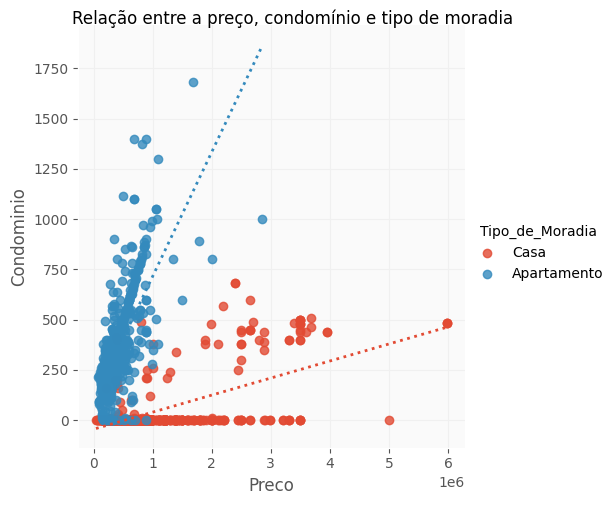

In [456]:
g = sns.lmplot(x="Preco", y="Condominio",
               hue="Tipo_de_Moradia", hue_order=["Casa", "Apartamento"],
               data=df, ci=False, line_kws={"linestyle": ":",
                                            "linewidth": 2})
# Adiciona um título ao gráfico
plt.suptitle("Relação entre a preço, condomínio e tipo de moradia", y=1.00)
plt.show()

Como fica claro pelo gráfico, o valor do condomínio é afetado de maneira diferente pelo preço do imóvel caso o mesmo seja um apartamento ou casa.

Mesmo desconsiderando as observações cujos valores de condomínio foram preenchidos como 0 (casas na parte inferior do gráfico), podemos perceber que a correlação entre preço e valor de condomínio é mais forte para os apartamentos.

### Tratamento de valores duplicados

Nessa etapa, será verificado se existem registros duplicados em nosso conjunto de dados. Como nossos dados foram obtidos por web scraping, é possível que um vendedor tenha publicado diversos anúncios para um mesmo imóvel.

In [457]:
df.duplicated().sum()

10

In [458]:
df[df.duplicated()]

,Tipo_de_Moradia,Bairro,Area,Quartos,Banheiros,Vagas,Preco,Condominio,Aceita_Animais,Area_de_Servico,Churrasqueira,Elevador,Varanda,Piscina,Condominio_Fechado,Espaco_Gourmet,Portao_Eletronico,Quintal_ou_Jardim
155,Casa,São Bernardo,240.0,3.0,2.0,2.0,300000,0.0,False,False,False,False,False,False,False,False,False,False
157,Casa,Santa Efigênia,150.0,3.0,3.0,1.0,195000,0.0,False,False,False,False,False,False,False,False,False,False
182,Casa,São Mateus,166.0,3.0,3.0,1.0,680000,0.0,False,False,False,False,False,False,False,False,False,False
188,Casa,São Mateus,89.0,3.0,2.0,0.0,399000,0.0,False,False,False,False,False,False,False,False,False,False
281,Casa,São Pedro,120.0,3.0,1.0,0.0,180000,0.0,True,False,False,False,False,False,False,False,False,False
591,Apartamento,Paineiras,77.0,2.0,1.0,1.0,295000,224.0,True,False,False,False,False,False,False,False,False,False
923,Casa,Alto dos Passos,338.0,3.0,4.0,3.0,2000000,0.0,False,False,False,False,False,False,False,False,False,False
1158,Apartamento,Jardim Glória,107.0,3.0,2.0,1.0,350000,287.0,True,True,False,False,False,False,False,False,False,False
1217,Casa,Santa Efigênia,150.0,3.0,3.0,1.0,195000,0.0,True,False,False,False,False,False,False,False,False,False
1536,Casa,Benfica,100.0,2.0,3.0,2.0,380000,0.0,False,False,False,False,False,False,False,False,False,False


Temos 10 registros duplicados, e estes devem ser removidos do conjunto de dados, persistindo uma única observação para cada.

In [459]:
df = df.drop_duplicates().reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551 entries, 0 to 1550
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tipo_de_Moradia     1551 non-null   object 
 1   Bairro              1551 non-null   object 
 2   Area                1551 non-null   float64
 3   Quartos             1551 non-null   float64
 4   Banheiros           1551 non-null   float64
 5   Vagas               1551 non-null   float64
 6   Preco               1551 non-null   int64  
 7   Condominio          1551 non-null   float64
 8   Aceita_Animais      1551 non-null   object 
 9   Area_de_Servico     1551 non-null   object 
 10  Churrasqueira       1551 non-null   object 
 11  Elevador            1551 non-null   object 
 12  Varanda             1551 non-null   object 
 13  Piscina             1551 non-null   object 
 14  Condominio_Fechado  1551 non-null   object 
 15  Espaco_Gourmet      1551 non-null   object 
 16  Portao

Como é possível ver acima, os 10 registros duplicados foram corretamente eliminados.

### Tratamento de atributos com muitas categorias

O atributo `Bairro` possui um total de 70 categorias distintas, o que pode ser um problema para algoritmos de aprendizado de máquina. Podemos reduzir esse número agrupando os bairros em regiões, como mostrado no dicionário abaixo.

In [460]:
regioes = {
    'Central': ['Boa Vista', 'Bom Pastor', 'Centro', 'Granbery', 'Jardim Glória', 'Santa Helena', 'São Mateus', 'Teixeiras', 'Paineiras', 'Alto dos Passos', 'Morro da Glória', 'Passos'],
    'Zona Leste': ['Bairu', 'Bonfim', 'Linhares', 'Manoel Honório', 'Progresso', 'São Bernardo', 'Jardim do Sol', 'Bom Jardim', 'Santos Anjos'],
    'Zona Nordeste': ['Granjas Betania', 'Bom Clima', 'Mariano Procópio', 'Grama', 'Santa Terezinha', 'Filgueiras', 'Bandeirantes', 'Democrata', 'Jardim L Ermitage', 'Nossa Senhora das Graças', 'Parque Independencia III', 'Quintas das Avenidas', 'Vale do Ipê', 'Vivendas da Serra'],
    'Zona Norte': ['Barreira do Triunfo', 'Benfica', 'Francisco Bernardino', 'Industrial', 'Jóquei Clube', 'Nova Era', 'Fontesville', 'Santa Maria', 'Cidade do Sol', 'Amazônia', 'Encosta do Sol', 'Jardim Santa Isabel', 'Nova Benfica', 'Recanto da Mata', 'São Francisco de Paula', 'São Judas Tadeu'],
    'Zona Oeste': ['Aeroporto', 'Borboleta', 'São Pedro', 'Granville', 'Marilândia', 'Santos Dumont', 'Serra D água', 'Spina Ville II'],
    'Zona Sudeste': ['Poço Rico', 'Terras Altas'],
    'Zona Sul': ['Cascatinha', 'Jardim das Laranjeiras', 'Sagrado Coração de Jesus', 'Salvaterra', 'Santa Efigênia', 'Estrela Sul', 'Santa Luzia', 'Jardim de Alah', 'Mundo Novo']
}

In [461]:
def get_regiao(bairro):
  for k,v in regioes.items():
    if bairro in v:
      return k

In [462]:
df["Regiao"] = df["Bairro"].apply(lambda x: get_regiao(x))

df.head()

,Tipo_de_Moradia,Bairro,Area,Quartos,Banheiros,Vagas,Preco,Condominio,Aceita_Animais,Area_de_Servico,Churrasqueira,Elevador,Varanda,Piscina,Condominio_Fechado,Espaco_Gourmet,Portao_Eletronico,Quintal_ou_Jardim,Regiao
0,Apartamento,Santa Efigênia,150.0,2.0,3.0,1.0,195000,195.0,False,False,False,False,False,False,False,False,False,False,Zona Sul
1,Apartamento,Estrela Sul,70.0,2.0,2.0,1.0,250000,270.0,True,False,True,True,False,True,True,False,False,False,Zona Sul
2,Casa,Fontesville,217.0,3.0,3.0,1.0,420000,0.0,False,False,False,False,False,False,False,False,False,False,Zona Norte
3,Apartamento,Aeroporto,76.0,2.0,2.0,1.0,300000,200.0,True,True,False,True,True,True,False,True,False,False,Zona Oeste
4,Apartamento,Paineiras,63.0,2.0,1.0,0.0,148000,152.0,False,False,False,False,False,False,False,False,True,False,Central


In [463]:
df["Regiao"].value_counts()

Central          569
Zona Sul         286
Zona Oeste       276
Zona Nordeste    256
Zona Leste        82
Zona Norte        79
Zona Sudeste       3
Name: Regiao, dtype: int64

In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551 entries, 0 to 1550
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tipo_de_Moradia     1551 non-null   object 
 1   Bairro              1551 non-null   object 
 2   Area                1551 non-null   float64
 3   Quartos             1551 non-null   float64
 4   Banheiros           1551 non-null   float64
 5   Vagas               1551 non-null   float64
 6   Preco               1551 non-null   int64  
 7   Condominio          1551 non-null   float64
 8   Aceita_Animais      1551 non-null   object 
 9   Area_de_Servico     1551 non-null   object 
 10  Churrasqueira       1551 non-null   object 
 11  Elevador            1551 non-null   object 
 12  Varanda             1551 non-null   object 
 13  Piscina             1551 non-null   object 
 14  Condominio_Fechado  1551 non-null   object 
 15  Espaco_Gourmet      1551 non-null   object 
 16  Portao

Com o valor desse novo atributo, seria interessante avaliar o preço de imóvel para cada região.

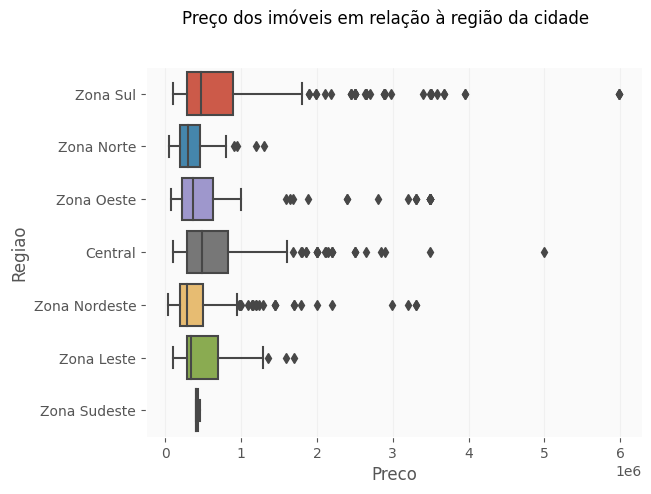

In [465]:
g = sns.boxplot(x="Preco", y="Regiao", data=df)
# Adiciona um título ao gráfico
plt.suptitle("Preço dos imóveis em relação à região da cidade", y=1.00)
plt.show()

Como podemos concluir a partir do gráfico acima, os imóveis nas regiões Sul e Central parecem ser os mais caros, enquanto os imóveis nas regiões Norte e Nordeste, os mais baratos.

### Separação em conjuntos de treino e teste

Nessa etapa, nosso conjunto de dados será separado em amostras de treinamento e teste. O primeiro é utilizado para a construção do modelo, enquanto o segundo serve para uma avaliação não enviesada do desempenho do mesmo, sendo utilizado de proxy para sua performance no ambiente de produção.

Para isso, devemos isolar a variável alvo (`Preco`) e definir uma proporção para o conjunto de teste, que neste trabalho será de 20% (0,2). A função `train_test_split` da biblioteca `scikit-learn` será utilizada para realizar essa separação.

In [466]:
# Retornando as variáveis categóricas para seus valores booleanos de 0 e 1
for var in bool_vars:
  df[var] = df[var].map({'False': 0, 'True': 1})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551 entries, 0 to 1550
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tipo_de_Moradia     1551 non-null   object 
 1   Bairro              1551 non-null   object 
 2   Area                1551 non-null   float64
 3   Quartos             1551 non-null   float64
 4   Banheiros           1551 non-null   float64
 5   Vagas               1551 non-null   float64
 6   Preco               1551 non-null   int64  
 7   Condominio          1551 non-null   float64
 8   Aceita_Animais      1551 non-null   int64  
 9   Area_de_Servico     1551 non-null   int64  
 10  Churrasqueira       1551 non-null   int64  
 11  Elevador            1551 non-null   int64  
 12  Varanda             1551 non-null   int64  
 13  Piscina             1551 non-null   int64  
 14  Condominio_Fechado  1551 non-null   int64  
 15  Espaco_Gourmet      1551 non-null   int64  
 16  Portao

In [467]:
# Define a proporção dos dados de teste
test_size = 0.2
# Define o conjunto de variáveis explicativas
X = df.drop(["Preco", "Bairro"], axis=1)
# Define a variável alvo
y = df["Preco"]

# Define uma semente aleatória para garantir a reprodutibilidade dos resultados
seed = 42
# Realiza a divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                                    shuffle=True, random_state=seed)

In [468]:
len(X_train), len(X_test)

(1240, 311)

In [469]:
X_train.head()

,Tipo_de_Moradia,Area,Quartos,Banheiros,Vagas,Condominio,Aceita_Animais,Area_de_Servico,Churrasqueira,Elevador,Varanda,Piscina,Condominio_Fechado,Espaco_Gourmet,Portao_Eletronico,Quintal_ou_Jardim,Regiao
1231,Casa,280.0,5.0,3.0,3.0,1.0,1,0,0,0,0,0,0,0,0,0,Zona Nordeste
788,Apartamento,84.0,3.0,1.0,1.0,240.0,0,0,0,0,0,0,0,0,1,0,Zona Nordeste
1251,Casa,520.0,5.0,3.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,Zona Nordeste
381,Apartamento,93.0,2.0,2.0,1.0,1.0,1,0,0,0,0,0,0,0,1,0,Zona Oeste
1348,Apartamento,68.0,2.0,1.0,1.0,300.0,0,0,1,1,0,1,0,0,0,0,Zona Oeste


In [470]:
y_train.head()

1231     949620
788      240000
1251    3200000
381      429900
1348     345000
Name: Preco, dtype: int64

Como podemos ver acima, os dados foram corretamente separados, com aproximadamente 80% para o conjunto de treinamento e 20% para o de teste.

### Transformações dos dados

Nessa etapa, serão aplicadas diferentes transformações aos dados, tanto categóricos quanto numéricos, visando um melhor desempenho dos modelos de Machine Learning desenvolvidos. Sendo assim, serão salvas três diferentes visões do conjunto de dados:

- Dados crus: a visão original dos dados, sem aplicar transformações. Essa visão pode funcionar para alguns modelos que exigem pouco processamento, mas provavelmente encontrará problemas na maioria dos casos;

- Dados com *one-hot-encoding* (`_ohe`): visão onde o *one-hot-encoding * é aplicado às variáveis categóricas e booleanas, transformando cada categoria em uma coluna, sem tratamento de redundância;

- Dados com *one-hot-encoding* e Normalização (`_pro`): visão onde, além do *one-hot-encoding*, é aplicada a normalização aos dados numéricos, considerando que suas distribuições, como visto anteriormente, não possuem comportamento gaussiano.

#### Dataset com *one-hot-encoding*

In [471]:
cat_vars = X.select_dtypes(include=['object']).columns

cat_vars

Index(['Tipo_de_Moradia', 'Regiao'], dtype='object')

In [472]:
# Define o encoder
ohe = OneHotEncoder(handle_unknown='ignore').fit(X_train[cat_vars])

# Cria o dataframe com one-hot-encoder
ohe_df = pd.DataFrame(ohe.transform(X_train[cat_vars]).toarray(),
                      columns=ohe.get_feature_names_out(),
                      index=X_train.index)
X_train_ohe = pd.concat([X_train, ohe_df], axis=1).drop(cat_vars, axis=1)

X_train_ohe.head()

,Area,Quartos,Banheiros,Vagas,Condominio,Aceita_Animais,Area_de_Servico,Churrasqueira,Elevador,Varanda,...,Quintal_ou_Jardim,Tipo_de_Moradia_Apartamento,Tipo_de_Moradia_Casa,Regiao_Central,Regiao_Zona Leste,Regiao_Zona Nordeste,Regiao_Zona Norte,Regiao_Zona Oeste,Regiao_Zona Sudeste,Regiao_Zona Sul
1231,280.0,5.0,3.0,3.0,1.0,1,0,0,0,0,...,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
788,84.0,3.0,1.0,1.0,240.0,0,0,0,0,0,...,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1251,520.0,5.0,3.0,0.0,0.0,0,0,0,0,0,...,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
381,93.0,2.0,2.0,1.0,1.0,1,0,0,0,0,...,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1348,68.0,2.0,1.0,1.0,300.0,0,0,1,1,0,...,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [473]:
# Aplicando o encoder no conjunto de teste
ohe_df = pd.DataFrame(ohe.transform(X_test[cat_vars]).toarray(),
                      columns=ohe.get_feature_names_out(),
                      index=X_test.index)
X_test_ohe = pd.concat([X_test, ohe_df], axis=1).drop(cat_vars, axis=1)

X_test_ohe.head()

,Area,Quartos,Banheiros,Vagas,Condominio,Aceita_Animais,Area_de_Servico,Churrasqueira,Elevador,Varanda,...,Quintal_ou_Jardim,Tipo_de_Moradia_Apartamento,Tipo_de_Moradia_Casa,Regiao_Central,Regiao_Zona Leste,Regiao_Zona Nordeste,Regiao_Zona Norte,Regiao_Zona Oeste,Regiao_Zona Sudeste,Regiao_Zona Sul
1520,44.0,2.0,1.0,0.0,150.0,0,0,0,0,0,...,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
621,100.0,2.0,2.0,2.0,0.0,1,0,0,0,1,...,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
352,148.0,3.0,3.0,2.0,0.0,0,0,0,0,1,...,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
353,104.0,3.0,3.0,2.0,1.0,1,1,0,0,1,...,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
513,65.0,2.0,1.0,1.0,220.0,1,1,0,1,1,...,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Dataset com *one-hot-encoding* e Normalização

In [474]:
num_vars = X.select_dtypes(include=['int', 'float']).columns
num_vars = [var for var in num_vars if var not in bool_vars]

num_vars

['Area', 'Quartos', 'Banheiros', 'Vagas', 'Condominio']

In [475]:
# Define o encoder
mms = MinMaxScaler().fit(X_train[num_vars])

# Cria o dataframe com one-hot-encoder e normalização
X_train_pro = X_train_ohe.copy()
X_train_pro[num_vars] = mms.transform(X_train_pro[num_vars])

X_train_pro.head()

,Area,Quartos,Banheiros,Vagas,Condominio,Aceita_Animais,Area_de_Servico,Churrasqueira,Elevador,Varanda,...,Quintal_ou_Jardim,Tipo_de_Moradia_Apartamento,Tipo_de_Moradia_Casa,Regiao_Central,Regiao_Zona Leste,Regiao_Zona Nordeste,Regiao_Zona Norte,Regiao_Zona Oeste,Regiao_Zona Sudeste,Regiao_Zona Sul
1231,0.170886,0.500,0.250,0.1875,0.000595,1,0,0,0,0,...,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
788,0.046835,0.250,0.000,0.0625,0.142857,0,0,0,0,0,...,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1251,0.322785,0.500,0.250,0.0000,0.000000,0,0,0,0,0,...,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
381,0.052532,0.125,0.125,0.0625,0.000595,1,0,0,0,0,...,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1348,0.036709,0.125,0.000,0.0625,0.178571,0,0,1,1,0,...,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [476]:
# Aplicando o encoder no conjunto de teste
X_test_pro = X_test_ohe.copy()
X_test_pro[num_vars] = mms.transform(X_test_pro[num_vars])

X_test_pro.head()

,Area,Quartos,Banheiros,Vagas,Condominio,Aceita_Animais,Area_de_Servico,Churrasqueira,Elevador,Varanda,...,Quintal_ou_Jardim,Tipo_de_Moradia_Apartamento,Tipo_de_Moradia_Casa,Regiao_Central,Regiao_Zona Leste,Regiao_Zona Nordeste,Regiao_Zona Norte,Regiao_Zona Oeste,Regiao_Zona Sudeste,Regiao_Zona Sul
1520,0.021519,0.125,0.000,0.0000,0.089286,0,0,0,0,0,...,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
621,0.056962,0.125,0.125,0.1250,0.000000,1,0,0,0,1,...,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
352,0.087342,0.250,0.250,0.1250,0.000000,0,0,0,0,1,...,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
353,0.059494,0.250,0.250,0.1250,0.000595,1,1,0,0,1,...,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
513,0.034810,0.125,0.000,0.0625,0.130952,1,1,0,1,1,...,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Visualizando os dados com PCA

Nessa parte, será aplicada uma técnica de redução de dimensionalidade dos dados que permita visualizá-los a partir de um gráfico em 2D. Para isso, será utilizada a Análise de Componentes Principais (PCA), uma técnica linear que encontra os eixos de maior variação dos dados (componentes principais).

In [477]:
X_pca = pd.DataFrame(mms.transform(X[num_vars]),columns=num_vars)

X_pca.head()

,Area,Quartos,Banheiros,Vagas,Condominio
0,0.088608,0.125,0.250,0.0625,0.116071
1,0.037975,0.125,0.125,0.0625,0.160714
2,0.131013,0.250,0.250,0.0625,0.000000
3,0.041772,0.125,0.125,0.0625,0.119048
4,0.033544,0.125,0.000,0.0000,0.090476


In [478]:
# Aplicando o PCA aos dados
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X_pca), columns=['PC1', 'PC2'])

X_pca.head()

,PC1,PC2
0,-0.007984,0.035699
1,-0.117151,0.048673
2,0.090134,-0.092168
3,-0.110515,0.008873
4,-0.215128,-0.055838


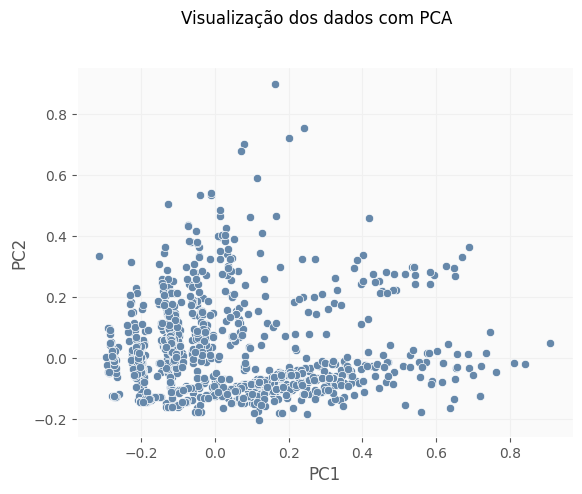

In [479]:
g = sns.scatterplot(x="PC1", y="PC2", data=X_pca, color=cor_padrao)
# Adiciona um título ao gráfico
plt.suptitle("Visualização dos dados com PCA", y=1.00)
plt.show()

Agora, podemos analisar os dados em função dos atributos originais, tentando entender como o algoritmo atuou na redução de dimensionalidade.

In [480]:
X_pca[X.columns] = X
X_pca["Preco"] = y

X_pca.head()

,PC1,PC2,Tipo_de_Moradia,Area,Quartos,Banheiros,Vagas,Condominio,Aceita_Animais,Area_de_Servico,Churrasqueira,Elevador,Varanda,Piscina,Condominio_Fechado,Espaco_Gourmet,Portao_Eletronico,Quintal_ou_Jardim,Regiao,Preco
0,-0.007984,0.035699,Apartamento,150.0,2.0,3.0,1.0,195.0,0,0,0,0,0,0,0,0,0,0,Zona Sul,195000
1,-0.117151,0.048673,Apartamento,70.0,2.0,2.0,1.0,270.0,1,0,1,1,0,1,1,0,0,0,Zona Sul,250000
2,0.090134,-0.092168,Casa,217.0,3.0,3.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,Zona Norte,420000
3,-0.110515,0.008873,Apartamento,76.0,2.0,2.0,1.0,200.0,1,1,0,1,1,1,0,1,0,0,Zona Oeste,300000
4,-0.215128,-0.055838,Apartamento,63.0,2.0,1.0,0.0,152.0,0,0,0,0,0,0,0,0,1,0,Central,148000


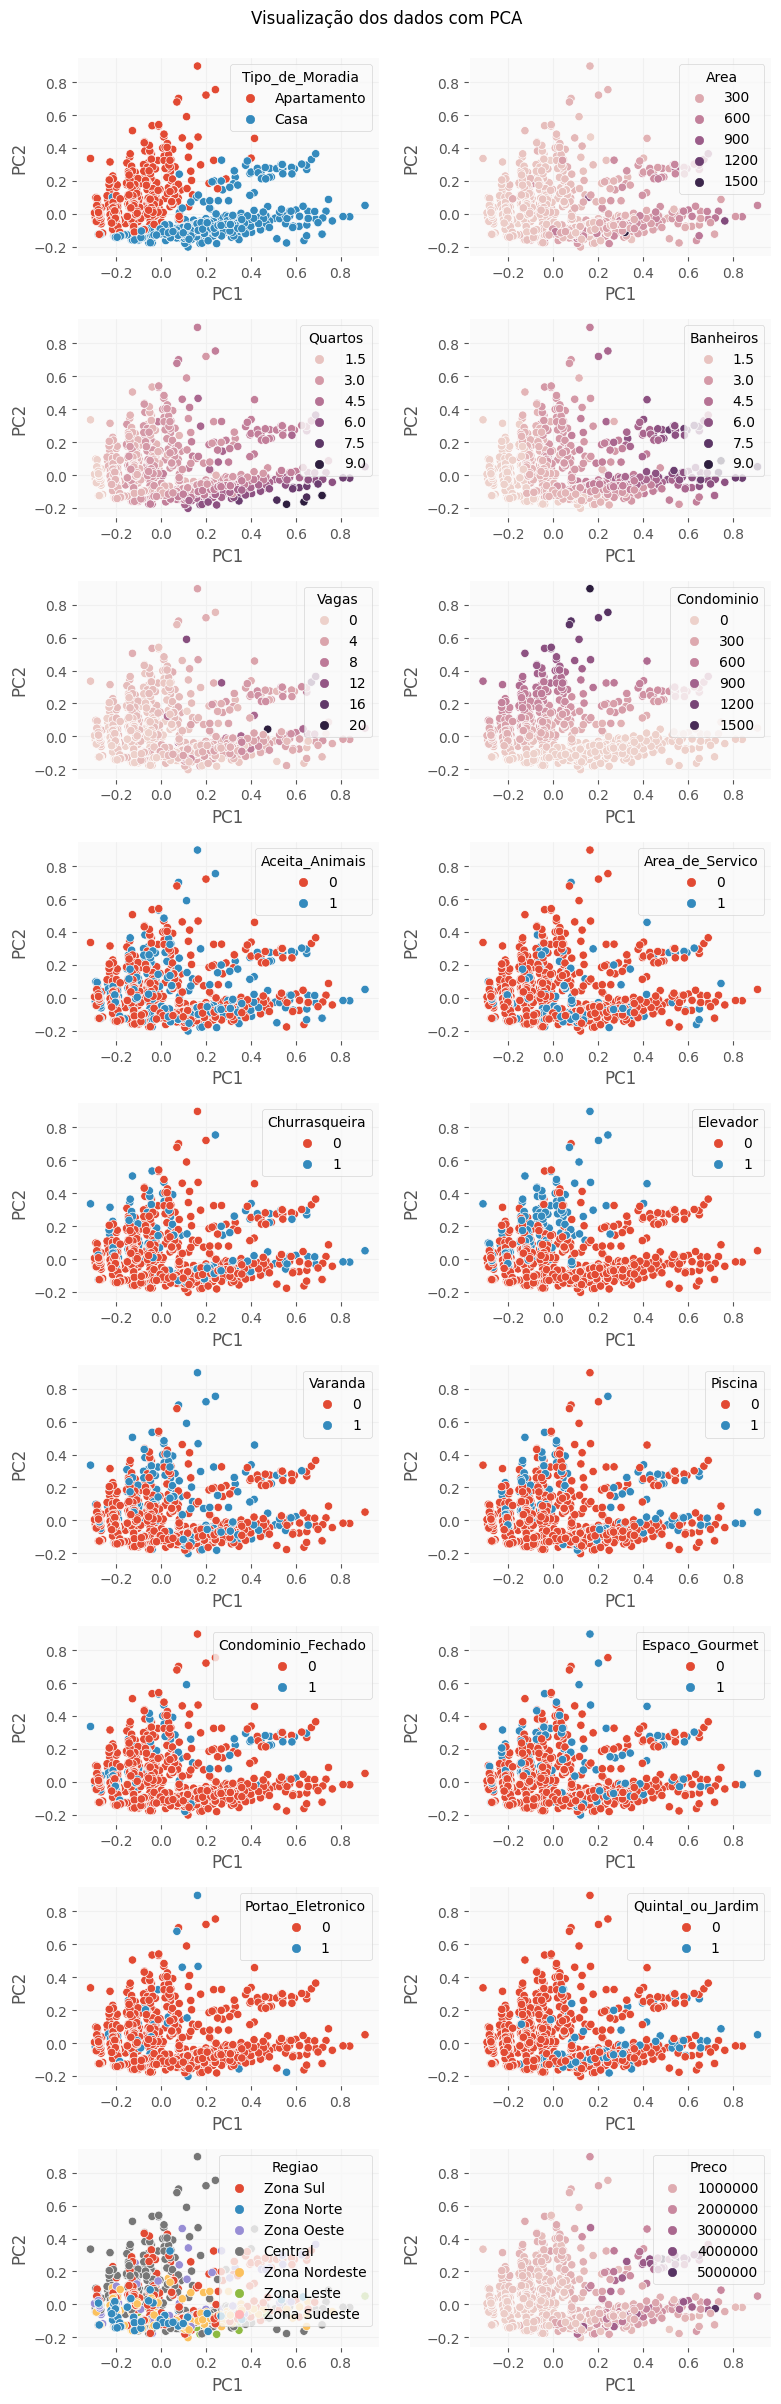

In [481]:
pca_vars = X_pca.columns[2:]

# Cria um grid com três linhas
fig, axes = plt.subplots(9, 2, figsize=(8,24))
plt.subplots_adjust(hspace=0.2)

# Itera pelo grid plotando os gráficos
idx = 0
for row in range(9):
  for col in range(2):
    ax = axes[row, col]
    sns.scatterplot(x="PC1", y="PC2", hue=pca_vars[idx], data=X_pca, ax=ax)
    idx += 1

# Adiciona um título ao gráfico
plt.suptitle("Visualização dos dados com PCA", y=1.00)
# Elimina margens desnecessárias
plt.tight_layout()

É interessante notar como os dados relacionados ao tipo de moradia ficam bem divididos na visualização, mesmo que essa informação não tenha sido fornecida ao PCA. Nesse caso, a área do imóvel e valor do condomínio podem ter atuado como proxy do tipo de moradia.

É possível perceber que o valor de condomínio (linha 3, coluna 2) está fortemente correlacionado com o valor da segunda componente principal (PC2). A medida que o valor dessa componente cresce, o valor de condomínio também é maior.

Outra observação importante é que o preço do imóvel, outra informação não fornecida ao algoritmo, parece crescer no sentido superior direito da visualização.

## Conclusões